In [1]:
# Stress-Test
import sys
sys.path.insert(0, '..')

import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


import database.db_credentials as dbc
from database.connection import Neo4jConnection

from order_search import PermuteSearch
from embed_search import EmbedSearch
from naive_solution import NaiveSolution

/home/mbeluis/.virtualenv/prjenv/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# connect to the road network database
app = Neo4jConnection(dbc.DB_URL, dbc.DB_USERNAME, dbc.DB_PW)

Successfully connected to Neo4j database (server: bolt://localhost:7687.)


In [3]:
# get the data from the database as a networkx graph
graph = app.get_data()

permutation = [12, 19, 10, 93, 82, 40, 21, 92, 79, 48, 7, 85, 84, 94, 71, 17, 35, 53, 20, 55, 56, 39, 18, 2,
               66, 86, 38, 98, 4, 63, 32, 73, 28, 50, 91, 3, 23, 58, 46, 13, 97, 57, 81, 76, 36, 65, 87, 41,
               88, 59, 15, 42, 8, 90, 83, 69, 72, 33, 96, 1, 80, 37, 99, 52, 74, 68, 22, 70, 60, 54, 47, 45,
               29, 0, 62, 24, 89, 77, 61, 64, 31, 49, 27, 5, 30, 51, 78, 26, 9, 95, 25, 16, 34, 43, 6, 11,
               67, 14, 75, 44]

%time route0 = NaiveSolution.NaiveBuildRoute(0, 16, graph, list(permutation))

print(route0)

CPU times: user 4.51 ms, sys: 102 µs, total: 4.61 ms
Wall time: 4.62 ms
[0, 10, 20, 21, 22, 12, 2, 3, 4, 5, 15, 25, 35, 36, 46, 56, 55, 65, 66, 76, 86, 85, 84, 94, 95, 96, 97, 98, 88, 87, 77, 78, 79, 69, 59, 58, 48, 38, 39, 29, 19, 18, 17, 7, 6, 16]


In [4]:
# get the data from the database as a networkx graph
graph = app.get_data()

permutation = [12, 19, 10, 93, 82, 40, 21, 92, 79, 48, 7, 85, 84, 94, 71, 17, 35, 53, 20, 55, 56, 39, 18, 2, 66, 86,
               38, 98, 4, 63, 32, 73, 28, 50, 91, 3, 23, 58, 46, 13, 97, 57, 81, 76, 36, 65, 87, 41, 88, 59, 15, 42,
               8, 90, 83, 69, 72, 33, 96, 1, 80, 37, 99, 52, 74, 68, 22, 70, 60, 54, 47, 45, 29, 0, 62, 24, 89, 77,
               61, 64, 31, 49, 27, 5, 30, 51, 78, 26, 9, 95, 25, 16, 34, 43, 6, 11, 67, 14, 75, 44]

%time route1 = EmbedSearch.SearchWeightedGraph(0, 16, graph, list(permutation))

print(route1)

CPU times: user 4.61 ms, sys: 122 µs, total: 4.73 ms
Wall time: 4.74 ms
[0, 10, 20, 21, 22, 12, 2, 3, 4, 5, 15, 25, 35, 36, 46, 56, 55, 65, 66, 76, 86, 85, 84, 94, 95, 96, 97, 98, 88, 87, 77, 78, 79, 69, 59, 58, 48, 38, 39, 29, 19, 18, 17, 7, 6, 16]


In [5]:
# get the data from the database as a networkx graph
graph = app.get_data()

permutation = [12, 19, 10, 93, 82, 40, 21, 92, 79, 48, 7, 85, 84, 94, 71, 17, 35, 53, 20, 55, 56, 39, 18, 2, 66, 86,
               38, 98, 4, 63, 32, 73, 28, 50, 91, 3, 23, 58, 46, 13, 97, 57, 81, 76, 36, 65, 87, 41, 88, 59, 15, 42,
               8, 90, 83, 69, 72, 33, 96, 1, 80, 37, 99, 52, 74, 68, 22, 70, 60, 54, 47, 45, 29, 0, 62, 24, 89, 77,
               61, 64, 31, 49, 27, 5, 30, 51, 78, 26, 9, 95, 25, 16, 34, 43, 6, 11, 67, 14, 75, 44]

%time route2 = PermuteSearch.CreateRoute(0, 16, graph, list(permutation))

print(route2)

CPU times: user 7.13 ms, sys: 0 ns, total: 7.13 ms
Wall time: 7.13 ms
[0, 10, 20, 21, 22, 12, 2, 3, 4, 5, 15, 25, 35, 36, 46, 56, 55, 65, 66, 76, 86, 85, 84, 94, 95, 96, 97, 98, 88, 87, 77, 78, 79, 69, 59, 58, 48, 38, 39, 29, 19, 18, 17, 7, 6, 16]


In [6]:
def visualize(df, y, method, save=True):
    # set figure size
    plt.figure(figsize = (12, 6))

    # plot a simple scatter plot for the naive solution
    sns.scatterplot(x = 'route_length',
                    y = 'naive_rt',
                    data = df,
                    label = 'Naive Solution Run-time')
    
    # plot a simple scatter plot for the proposed solution
    sns.scatterplot(x = 'route_length',
                    y = f'{y}_rt',
                    data = df,
                    label = f'{method} Run-time')

    # plot using rolling average (naive)
    sns.lineplot(x = 'route_length',
                 y = 'naive_roll_avg',
                 data = df,
                 label = 'Naive Solution Roll-Avrg time')

    # plot using rolling average (proposed)
    sns.lineplot(x = 'route_length',
                 y = f'{y}_roll_avg',
                 data = df,
                 label = f'{method} Roll-Avrg time')

    # set some plotting parameters
    plt.xlabel('Route Length')
    plt.ylabel('Run-time (ms)')
    plt.savefig(f'{y}_naive.png')
    plt.show()

In [7]:
import time

# list holding run-time of the naive solution
time_ns = []

# list holding run-time of the permute&search solution
time_ps = []

# list to hold the length of generated routes
routes_lens = []

for i in range(1000):
    
    graph = app.get_data()
    
    permutation = np.random.choice(range(100), size=100, replace=False)
    
    org, dest = np.random.choice([0, 16, 76, 38, 23, 42, 43, 47, 70, 31], size=2, replace=False)
    print("--"*15)
    start_n = time.time()
    route0 = NaiveSolution.NaiveBuildRoute(org, dest, graph, list(permutation))
    end_n = time.time()
    
    start_p = time.time()
    route1 = PermuteSearch.CreateRoute(org, dest, graph, list(permutation))
    end_p = time.time()
    
    if route0 != route1:
        print(f"Routes:\n1. {route0}\n2. {route1} \nnot matching! Breaking!")
        break
        
    time_ns.append((end_n - start_n)*1000)
    time_ps.append((end_p - start_p)*1000)
    routes_lens.append(len(route0))
    
    print(f"Route {i}: {route0} found!")
    print(f"Run-time naive solution: {time_ns[-1]:.3} ms")
    print(f"Run-time P&S solution: {time_ps[-1]:.3} ms")

ps_na_df = pd.DataFrame(list(zip(time_ns, time_ps, routes_lens)), columns=['naive_rt', 'permute_rt', 'route_length'])

print(ps_na_df.head(10))

------------------------------
Route 0: [76, 66, 67, 68, 69, 79, 89, 88, 87, 97, 96, 86, 85, 75, 74, 73, 72, 62, 52, 42, 41, 51, 61, 60, 50, 40, 30, 31] found!
Run-time naive solution: 10.5 ms
Run-time P&S solution: 21.1 ms
------------------------------
Route 1: [76, 77, 78, 88, 87, 86, 85, 75, 74, 73, 63, 53, 54, 55, 56, 57, 58, 59, 49, 39, 29, 19, 9, 8, 7, 6, 16, 15, 5, 4, 3, 2, 12, 22, 23, 33, 34, 35, 25, 26, 27, 28, 38, 48, 47, 46, 45, 44, 43, 42, 41, 40, 50, 60, 70] found!
Run-time naive solution: 14.7 ms
Run-time P&S solution: 21.4 ms
------------------------------
Route 2: [70, 60, 50, 40, 30, 31, 32, 42, 43, 53, 54, 64, 74, 75, 65, 66, 56, 46, 47] found!
Run-time naive solution: 3.72 ms
Run-time P&S solution: 22.0 ms
------------------------------
Route 3: [31, 32, 42, 52, 53, 43, 44, 34, 24, 14, 13, 12, 2, 1, 0, 10, 20, 30, 40, 50, 60, 70] found!
Run-time naive solution: 4.59 ms
Run-time P&S solution: 23.4 ms
------------------------------
Route 4: [47, 57, 67, 68, 69, 79, 89

------------------------------
Route 31: [23, 24, 34, 35, 25, 26, 36, 46, 56, 57, 67, 77, 76, 66, 65, 64, 63, 73, 72, 82, 81, 80, 90, 91, 92, 93, 94, 84, 74, 75, 85, 95, 96, 97, 87, 88, 89, 79, 69, 59, 58, 48, 38, 28, 29, 19, 9, 8, 7, 6, 5, 4, 14, 13, 3, 2, 1, 0, 10, 11, 12, 22, 21, 31, 30, 40, 41, 51, 52, 42] found!
Run-time naive solution: 19.1 ms
Run-time P&S solution: 22.7 ms
------------------------------
Route 32: [42, 52, 62, 61, 60, 70, 80, 90, 91, 92, 93, 83, 82, 72, 73, 74, 64, 65, 55, 45, 35, 34, 33, 32, 22, 23, 13, 14, 4, 5, 15, 25, 26, 36, 46, 47, 37, 38] found!
Run-time naive solution: 8.06 ms
Run-time P&S solution: 22.1 ms
------------------------------
Route 33: [38, 48, 58, 57, 56, 66, 65, 64, 63, 62, 52, 51, 41, 40, 30, 31, 21, 11, 10, 0, 1, 2, 3, 13, 23, 24, 34, 44, 43, 53, 54, 55, 45, 35, 36, 26, 16, 15, 5, 6, 7, 17, 27, 28, 18, 19, 29, 39, 49, 59, 69, 68, 78, 77, 76, 75, 85, 95, 94, 93, 92, 91, 81, 80, 70] found!
Run-time naive solution: 19.6 ms
Run-time P&S soluti

------------------------------
Route 61: [38, 28, 27, 17, 7, 8, 9, 19, 29, 39, 49, 59, 69, 79, 78, 68, 67, 57, 47, 37, 36, 26, 25, 24, 34, 44, 54, 64, 74, 75, 65, 55, 56, 66, 76, 77, 87, 86, 85, 84, 94, 93, 83, 73, 72, 62, 52, 51, 41, 42, 32, 22, 12, 13, 3, 2, 1, 0, 10, 20, 21, 31, 30, 40, 50, 60, 61, 71, 81, 80, 70] found!
Run-time naive solution: 22.8 ms
Run-time P&S solution: 23.3 ms
------------------------------
Route 62: [43, 33, 34, 35, 45, 55, 65, 66, 56, 57, 67, 68, 69, 79, 78, 88, 87, 86, 85, 84, 74, 73, 63, 53, 52, 51, 41, 31, 30, 20, 21, 22, 23, 13, 14, 15, 5, 4, 3, 2, 12, 11, 1, 0] found!
Run-time naive solution: 11.8 ms
Run-time P&S solution: 21.5 ms
------------------------------
Route 63: [70, 80, 90, 91, 92, 82, 72, 62, 63, 53, 54, 64, 65, 66, 76, 75, 74, 73, 83, 84, 94, 95, 85, 86, 87, 88, 98, 99, 89, 79, 69, 68, 78, 77, 67, 57, 47, 37, 36, 46, 56, 55, 45, 44, 43, 42] found!
Run-time naive solution: 10.1 ms
Run-time P&S solution: 22.2 ms
------------------------------

------------------------------
Route 96: [47, 48, 49, 39, 38, 37, 27, 26, 16, 15, 5, 4, 3, 13, 23, 33, 34, 35, 45, 44, 43, 53, 63, 62, 61, 71, 72, 82, 83, 73, 74, 75, 65, 55, 56, 57, 58, 68, 69, 79, 78, 88, 98, 97, 96, 86, 87, 77, 67, 66, 76] found!
Run-time naive solution: 12.0 ms
Run-time P&S solution: 22.1 ms
------------------------------
Route 97: [42, 32, 22, 12, 11, 21, 31, 41, 40, 50, 60, 70, 80, 90, 91, 92, 82, 72, 73, 74, 64, 65, 55, 56, 57, 58, 59, 49, 48, 47, 37, 36, 26, 16, 17, 18, 28, 29, 39, 38] found!
Run-time naive solution: 23.9 ms
Run-time P&S solution: 22.8 ms
------------------------------
Route 98: [38, 39, 29, 19, 18, 17, 7, 6, 16] found!
Run-time naive solution: 1.65 ms
Run-time P&S solution: 21.9 ms
------------------------------
Route 99: [31, 30, 20, 10, 0, 1, 2, 3, 13, 12, 22, 32, 42, 41, 51, 61, 71, 81, 80, 90, 91, 92, 93, 83, 84, 85, 86, 76] found!
Run-time naive solution: 5.5 ms
Run-time P&S solution: 25.1 ms
------------------------------
Route 100: [43,

------------------------------
Route 133: [0, 1, 11, 12, 22, 23] found!
Run-time naive solution: 0.836 ms
Run-time P&S solution: 22.0 ms
------------------------------
Route 134: [76, 66, 56, 46, 36, 37, 27, 28, 29, 39, 49, 59, 69, 68, 78, 79, 89, 99, 98, 97, 87, 86, 96, 95, 94, 93, 83, 73, 63, 62, 72, 71, 61, 51, 41, 42, 43, 44, 34, 35, 25, 15, 14, 4, 5, 6, 7, 17, 16] found!
Run-time naive solution: 24.2 ms
Run-time P&S solution: 23.6 ms
------------------------------
Route 135: [31, 32, 22, 23, 24, 14, 13, 3, 2, 12, 11, 10, 20, 30, 40, 50, 60, 70, 71, 61, 62, 72, 73, 74, 84, 83, 82, 81, 80, 90, 91, 92, 93, 94, 95, 96, 97, 87, 88, 89, 79, 78, 68, 58, 59, 49, 39, 29, 28, 27, 26, 25, 35, 45, 46, 47, 48, 38] found!
Run-time naive solution: 13.9 ms
Run-time P&S solution: 21.9 ms
------------------------------
Route 136: [38, 28, 27, 26, 16, 15, 14, 13, 12, 11, 21, 31, 30, 20, 10, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 19, 29, 39, 49, 59, 69, 68, 58, 57, 56, 55, 65, 75, 74, 73, 83, 82, 92, 91, 81, 

------------------------------
Route 167: [76, 77, 67, 57, 47, 37, 38, 48, 49, 59, 69, 79, 89, 99, 98, 97, 87, 86, 85, 75, 65, 64, 54, 44, 43, 42] found!
Run-time naive solution: 4.97 ms
Run-time P&S solution: 22.4 ms
------------------------------
Route 168: [70, 71, 81, 91, 92, 93, 94, 95, 85, 86, 96, 97, 98, 88, 89, 79, 78, 68, 58, 48, 38] found!
Run-time naive solution: 3.55 ms
Run-time P&S solution: 22.2 ms
------------------------------
Route 169: [38, 48, 58, 57, 67, 68, 78, 88, 98, 97, 87, 86, 85, 84, 94, 93, 92, 82, 72, 62, 52, 53, 54, 55, 56, 46, 45, 35, 25, 26, 16, 17, 27, 28, 18, 8, 7, 6, 5, 15, 14, 24, 23, 33, 32, 42, 41, 31] found!
Run-time naive solution: 14.5 ms
Run-time P&S solution: 24.0 ms
------------------------------
Route 170: [76, 86, 87, 88, 98, 97, 96, 95, 94, 84, 83, 73, 63, 64, 74, 75, 65, 55, 54, 44, 34, 24, 25, 15, 16] found!
Run-time naive solution: 4.76 ms
Run-time P&S solution: 23.7 ms
------------------------------
Route 171: [16, 17, 27, 28, 38, 39, 2

------------------------------
Route 199: [23, 22, 21, 20, 10, 0, 1, 11, 12, 2, 3, 4, 14, 24, 34, 33, 32, 31, 41, 51, 52, 53, 54, 55, 65, 66, 76, 77, 78, 79, 69, 68, 58, 48, 47, 37, 36, 26, 16, 6, 5, 15, 25, 35, 45, 44, 43, 42] found!
Run-time naive solution: 23.1 ms
Run-time P&S solution: 23.5 ms
------------------------------
Route 200: [23, 33, 34, 44, 43, 42, 52, 53, 54, 55, 65, 75, 76, 77, 78, 88, 89, 99, 98, 97, 96, 86, 85, 84, 83, 82, 92, 91, 90, 80, 70, 60, 61, 51, 50, 40, 41, 31] found!
Run-time naive solution: 12.5 ms
Run-time P&S solution: 22.0 ms
------------------------------
Route 201: [31, 41, 40, 30, 20, 10, 0, 1, 2, 12, 11, 21, 22, 32, 33, 34, 44, 54, 64, 74, 73, 63, 62, 61, 71, 70, 80, 81, 82, 83, 84, 85, 86, 87, 77, 67, 66, 56, 46, 47, 48, 49, 39, 29, 19, 9, 8, 7, 6, 5, 4, 3, 13, 23, 24, 25, 35, 45, 55, 65, 75, 76] found!
Run-time naive solution: 27.2 ms
Run-time P&S solution: 24.5 ms
------------------------------
Route 202: [31, 32, 33, 34, 24, 23, 22, 12, 11, 10, 

------------------------------
Route 232: [31, 32, 22, 12, 11, 1, 0, 10, 20, 30, 40, 50, 51, 52, 42, 43, 33, 34, 35, 45, 55, 65, 66, 76, 77, 78, 88, 89, 79, 69, 68, 58, 57, 47, 46, 36, 26, 16, 15, 25, 24, 14, 4, 3, 13, 23] found!
Run-time naive solution: 24.3 ms
Run-time P&S solution: 24.4 ms
------------------------------
Route 233: [43, 33, 23, 24, 14, 15, 25, 35, 34, 44, 54, 55, 65, 66, 56, 57, 47, 37, 38, 48, 49, 59, 69, 68, 67, 77, 87, 88, 89, 99, 98, 97, 96, 86, 76, 75, 74, 84, 83, 93, 92, 91, 81, 71, 72, 62, 63, 53, 52, 51, 50, 40, 30, 20, 21, 31, 32, 22, 12, 2, 1, 11, 10, 0] found!
Run-time naive solution: 19.2 ms
Run-time P&S solution: 23.0 ms
------------------------------
Route 234: [16, 6, 5, 15, 25, 24, 34, 33, 32, 31, 21, 20, 30, 40, 50, 51, 61, 71, 70, 80, 90, 91, 81, 82, 72, 73, 74, 64, 63, 53, 54, 55, 45, 44, 43] found!
Run-time naive solution: 30.9 ms
Run-time P&S solution: 25.3 ms
------------------------------
Route 235: [70, 71, 81, 91, 92, 93, 94, 84, 74, 73, 63, 

------------------------------
Route 264: [0, 1, 2, 12, 22, 23] found!
Run-time naive solution: 0.997 ms
Run-time P&S solution: 22.2 ms
------------------------------
Route 265: [42, 32, 31, 21, 11, 12, 22, 23, 24, 34, 44, 43, 53, 52, 51, 50, 60, 61, 71, 70, 80, 90, 91, 92, 82, 83, 73, 63, 64, 65, 75, 76] found!
Run-time naive solution: 8.21 ms
Run-time P&S solution: 22.0 ms
------------------------------
Route 266: [31, 30, 40, 41, 51, 61, 60, 70, 71, 81, 82, 72, 73, 63, 62, 52, 53, 54, 64, 74, 75, 65, 66, 67, 68, 69, 59, 58, 48, 38, 39, 29, 19, 9, 8, 7, 17, 27, 26, 36, 35, 25, 24, 34, 33, 23, 13, 12, 2, 3, 4, 14, 15, 16] found!
Run-time naive solution: 26.6 ms
Run-time P&S solution: 25.1 ms
------------------------------
Route 267: [16, 6, 5, 4, 3, 2, 1, 11, 10, 20, 30, 31, 21, 22, 23, 33, 43, 42, 52, 62, 63, 73, 74, 84, 85, 86, 76, 75, 65, 66, 67, 57, 47, 37, 27, 28, 38] found!
Run-time naive solution: 15.6 ms
Run-time P&S solution: 22.1 ms
------------------------------
Route 268: 

------------------------------
Route 296: [23, 33, 34, 24, 25, 15, 5, 4, 3, 13, 12, 22, 32, 42, 41, 51, 61, 60, 70, 80, 81, 82, 83, 73, 74, 64, 65, 55, 45, 44, 54, 53, 43] found!
Run-time naive solution: 27.7 ms
Run-time P&S solution: 24.6 ms
------------------------------
Route 297: [42, 43] found!
Run-time naive solution: 0.266 ms
Run-time P&S solution: 22.4 ms
------------------------------
Route 298: [31, 30, 20, 10, 0] found!
Run-time naive solution: 0.753 ms
Run-time P&S solution: 22.3 ms
------------------------------
Route 299: [42, 41, 31, 32, 22, 12, 11, 1, 0, 10, 20, 30, 40, 50, 60, 61, 71, 72, 62, 63, 64, 54, 55, 45, 46, 36, 26, 25, 15, 14, 13, 3, 4, 5, 6, 7, 17, 18, 19, 29, 39, 49, 48, 58, 57, 56, 66, 76] found!
Run-time naive solution: 14.8 ms
Run-time P&S solution: 22.7 ms
------------------------------
Route 300: [43, 33, 23] found!
Run-time naive solution: 0.649 ms
Run-time P&S solution: 22.0 ms
------------------------------
Route 301: [47, 57, 58, 68, 69, 79, 89, 88,

------------------------------
Route 330: [0, 1, 2, 3, 4, 14, 15, 25, 26, 27, 17, 7, 8, 9, 19, 18, 28, 38, 37, 47, 57, 56, 46, 45, 44, 43, 33, 32, 22, 23] found!
Run-time naive solution: 6.46 ms
Run-time P&S solution: 21.7 ms
------------------------------
Route 331: [31, 21, 22, 32, 33, 43, 44, 34, 35, 36, 46, 47, 48, 58, 68, 69, 59, 49, 39, 29, 19, 9, 8, 7, 17, 27, 26, 16, 6, 5, 4, 3, 13, 12, 2, 1, 11, 10, 20, 30, 40, 41, 51, 52, 53, 63, 64, 74, 75, 85, 86, 87, 77, 76] found!
Run-time naive solution: 26.4 ms
Run-time P&S solution: 26.2 ms
------------------------------
Route 332: [38, 39, 49, 59, 69, 68, 78, 79, 89, 88, 98, 97, 96, 95, 94, 84, 83, 82, 72, 62, 52, 42, 43, 44, 34, 24, 14, 4, 5, 15, 25, 35, 36, 37, 27, 28, 29, 19, 9, 8, 18, 17, 16] found!
Run-time naive solution: 29.1 ms
Run-time P&S solution: 25.1 ms
------------------------------
Route 333: [23, 24, 14, 4, 3, 2, 12, 22, 21, 20, 30, 31, 41, 51, 61, 60, 70] found!
Run-time naive solution: 3.62 ms
Run-time P&S solution: 

------------------------------
Route 360: [76, 66, 67, 68, 78, 79, 89, 99, 98, 97, 87, 86, 85, 95, 94, 84, 83, 82, 81, 71, 72, 62, 63, 73, 74, 75, 65, 55, 54, 53, 43, 42] found!
Run-time naive solution: 7.99 ms
Run-time P&S solution: 23.5 ms
------------------------------
Route 361: [23, 33, 32, 22, 21, 11, 1, 2, 3, 13, 14, 4, 5, 6, 16, 26, 27, 17, 18, 8, 9, 19, 29, 39, 49, 48, 58, 59, 69, 68, 78, 77, 87, 88, 89, 99, 98, 97, 96, 95, 94, 93, 92, 91, 81, 71, 70] found!
Run-time naive solution: 11.5 ms
Run-time P&S solution: 21.6 ms
------------------------------
Route 362: [23, 13, 14, 4, 3, 2, 1, 11, 10, 20, 30, 31, 32, 33, 43, 53, 63, 62, 72, 82, 81, 71, 61, 51, 52, 42, 41, 40, 50, 60, 70, 80, 90, 91, 92, 93, 94, 84, 85, 75, 65, 66, 76, 86, 87, 97, 98, 99, 89, 88, 78, 68, 69, 59, 49, 48, 38] found!
Run-time naive solution: 12.6 ms
Run-time P&S solution: 22.4 ms
------------------------------
Route 363: [47, 37, 27, 28, 38, 39, 49, 59, 69, 68, 78, 77, 87, 97, 96, 95, 85, 75, 76, 66, 67,

------------------------------
Route 392: [47, 48, 58, 59, 49, 39, 38] found!
Run-time naive solution: 1.02 ms
Run-time P&S solution: 22.6 ms
------------------------------
Route 393: [47, 46, 36, 37, 38, 48, 49, 59, 69, 68, 78, 77, 87, 86, 96, 95, 85, 75, 65, 55, 54, 44, 43] found!
Run-time naive solution: 4.4 ms
Run-time P&S solution: 22.4 ms
------------------------------
Route 394: [42, 41, 40, 30, 31, 21, 20, 10, 11, 12, 13, 23, 22, 32, 33, 34, 44, 45, 55, 54, 53, 63, 62, 72, 82, 83, 93, 92, 91, 90, 80, 81, 71, 61, 51, 50, 60, 70] found!
Run-time naive solution: 31.0 ms
Run-time P&S solution: 24.8 ms
------------------------------
Route 395: [0, 10, 20, 30, 40, 41, 51, 61, 62, 63, 64, 65, 55, 56, 57, 67, 68, 69, 59, 49, 39, 38] found!
Run-time naive solution: 15.2 ms
Run-time P&S solution: 22.2 ms
------------------------------
Route 396: [23, 22, 21, 11, 1, 0, 10, 20, 30, 40, 41, 42, 43, 44, 45, 55, 65, 75, 74, 73, 83, 93, 94, 95, 85, 86, 87, 97, 98, 88, 89, 79, 78, 68, 67, 57, 4

------------------------------
Route 427: [43, 33, 34, 44, 45, 46, 47, 57, 58, 68, 69, 79, 78, 77, 67, 66, 65, 75, 74, 64, 54, 53, 63, 62, 61, 71, 72, 82, 92, 91, 90, 80, 70, 60, 50, 51, 52, 42, 32, 22, 12, 2, 3, 13, 14, 15, 25, 24, 23] found!
Run-time naive solution: 22.0 ms
Run-time P&S solution: 24.6 ms
------------------------------
Route 428: [43, 33, 34, 24, 25, 15, 14, 4, 3, 2, 12, 13, 23, 22, 21, 31, 32, 42, 52, 62, 72, 82, 83, 84, 94, 93, 92, 91, 90, 80, 81, 71, 70, 60, 50, 51, 41, 40, 30, 20, 10, 11, 1, 0] found!
Run-time naive solution: 31.7 ms
Run-time P&S solution: 25.5 ms
------------------------------
Route 429: [47, 37, 27, 17, 18, 28, 29, 39, 49, 59, 58, 57, 56, 55, 45, 44, 43, 33, 23] found!
Run-time naive solution: 3.75 ms
Run-time P&S solution: 22.2 ms
------------------------------
Route 430: [31, 30, 20, 21, 22, 23, 33, 34, 35, 45, 46, 36, 37, 27, 28, 29, 39, 49, 59, 58, 68, 67, 66, 65, 75, 85, 86, 87, 97, 96, 95, 94, 93, 92, 91, 81, 80, 70, 60, 61, 62, 63, 64, 54

------------------------------
Route 458: [76, 75, 74, 73, 63, 62, 72, 82, 92, 91, 90, 80, 70, 60, 50, 40, 30, 20, 21, 22, 12, 13, 23, 24, 25, 15, 16] found!
Run-time naive solution: 6.16 ms
Run-time P&S solution: 21.1 ms
------------------------------
Route 459: [31, 21, 11, 12, 13, 3, 4, 14, 24, 25, 35, 36, 46, 47, 48, 38, 39, 49, 59, 69, 79, 78, 77, 87, 97, 96, 86, 85, 75, 65, 66, 67, 57, 56, 55, 54, 44, 34, 33, 32, 42, 41, 51, 61, 71, 81, 80, 70] found!
Run-time naive solution: 17.3 ms
Run-time P&S solution: 22.8 ms
------------------------------
Route 460: [42, 41, 31, 30, 20, 10, 0] found!
Run-time naive solution: 1.02 ms
Run-time P&S solution: 21.5 ms
------------------------------
Route 461: [47, 37, 27, 17, 18, 19, 29, 28, 38, 48, 49, 59, 69, 68, 67, 77, 76, 86, 85, 75, 74, 64, 63, 53, 54, 55, 45, 44, 34, 24, 23, 22, 12, 11, 21, 31, 41, 51, 50, 40, 30, 20, 10, 0] found!
Run-time naive solution: 24.9 ms
Run-time P&S solution: 23.0 ms
------------------------------
Route 462: [2

------------------------------
Route 492: [38, 28, 29, 19, 9, 8, 18, 17, 16, 15, 5, 4, 14, 13, 23] found!
Run-time naive solution: 2.74 ms
Run-time P&S solution: 24.4 ms
------------------------------
Route 493: [31, 41, 42, 43] found!
Run-time naive solution: 0.823 ms
Run-time P&S solution: 23.7 ms
------------------------------
Route 494: [47, 37, 27, 26, 16, 6, 7, 8, 18, 28, 29, 39, 49, 59, 69, 68, 67, 77, 87, 88, 89, 99, 98, 97, 96, 86, 85, 75, 65, 64, 74, 73, 83, 82, 81, 80, 70, 60, 50, 40, 41, 42, 52, 53, 43, 33, 32, 22, 12, 2, 3, 4, 14, 24, 25, 35, 45, 46, 56, 57, 58, 48, 38] found!
Run-time naive solution: 24.9 ms
Run-time P&S solution: 23.3 ms
------------------------------
Route 495: [70, 80, 81, 82, 92, 93, 83, 73, 74, 84, 85, 86, 76, 77, 78, 79, 69, 68, 67, 57, 56, 55, 54, 53, 43, 33, 32, 22, 21, 11, 10, 20, 30, 40, 50, 51, 52, 42] found!
Run-time naive solution: 28.9 ms
Run-time P&S solution: 24.2 ms
------------------------------
Route 496: [23, 24, 14, 15, 5, 6, 7, 8, 9,

------------------------------
Route 526: [47, 37, 38, 39, 49, 48, 58, 57, 56, 55, 45, 46, 36, 26, 16, 15, 14, 13, 23, 33, 32, 42, 52, 62, 72, 71, 70] found!
Run-time naive solution: 7.81 ms
Run-time P&S solution: 21.7 ms
------------------------------
Route 527: [16, 26, 27, 37, 36, 46, 45, 35, 34, 33, 32, 31, 41, 51, 50, 40, 30, 20, 10, 0, 1, 2, 12, 13, 14, 24, 25, 15, 5, 6, 7, 8, 9, 19, 18, 28, 38, 39, 49, 59, 69, 68, 78, 77, 76, 75, 74, 84, 94, 93, 92, 82, 72, 62, 52, 42] found!
Run-time naive solution: 17.5 ms
Run-time P&S solution: 22.8 ms
------------------------------
Route 528: [16, 26, 27, 37, 47, 57, 67, 66, 76, 86, 85, 84, 94, 93, 92, 82, 72, 73, 74, 75, 65, 64, 54, 53, 43, 33, 23, 22, 12, 11, 10, 20, 30, 31] found!
Run-time naive solution: 8.48 ms
Run-time P&S solution: 21.2 ms
------------------------------
Route 529: [43, 44, 54, 64, 63, 62, 52, 51, 61, 60, 70, 80, 81, 91, 92, 93, 94, 95, 85, 84, 74, 75, 65, 66, 56, 46, 45, 35, 25, 24, 34, 33, 23, 13, 3, 4, 5, 15, 16, 17

------------------------------
Route 558: [23, 22, 12, 11, 1, 2, 3, 13, 14, 15, 5, 6, 16, 17, 7, 8, 9, 19, 18, 28, 27, 37, 47, 57, 56, 55, 45, 35, 34, 33, 43, 44, 54, 64, 74, 73, 72, 71, 61, 51, 41, 31, 30, 40, 50, 60, 70, 80, 90, 91, 92, 82, 83, 84, 85, 86, 96, 97, 98, 99, 89, 79, 78, 68, 67, 66, 76] found!
Run-time naive solution: 23.2 ms
Run-time P&S solution: 24.0 ms
------------------------------
Route 559: [31, 32, 22, 23, 24, 25, 15, 14, 13, 3, 4, 5, 6, 16, 26, 27, 28, 18, 8, 9, 19, 29, 39, 38, 48, 49, 59, 58, 68, 78, 77, 87, 97, 96, 86, 76, 66, 56, 55, 45, 35, 34, 33, 43, 53, 52, 62, 72, 73, 63, 64, 65, 75, 74, 84, 94, 93, 92, 91, 90, 80, 81, 71, 61, 60, 50, 51, 41, 42] found!
Run-time naive solution: 22.7 ms
Run-time P&S solution: 23.2 ms
------------------------------
Route 560: [47, 46, 56, 55, 54, 64, 74, 73, 63, 53, 52, 51, 50, 40, 41, 31, 21, 11, 10, 0, 1, 2, 3, 13, 23] found!
Run-time naive solution: 4.86 ms
Run-time P&S solution: 23.0 ms
------------------------------
R

------------------------------
Route 590: [16, 6, 5, 4, 3, 2, 12, 22, 23, 33, 34, 35, 36, 46, 56, 66, 67, 57, 47] found!
Run-time naive solution: 3.93 ms
Run-time P&S solution: 22.3 ms
------------------------------
Route 591: [23, 24, 34, 44, 43, 42, 41, 40, 50, 60, 61, 62, 52, 53, 54, 55, 45, 46, 47] found!
Run-time naive solution: 3.7 ms
Run-time P&S solution: 22.4 ms
------------------------------
Route 592: [70, 71, 81, 91, 92, 93, 94, 84, 74, 75, 85, 86, 87, 88, 78, 68, 58, 59, 49, 39, 38, 37, 47, 57, 67, 77, 76, 66, 56, 46, 45, 35, 25, 15, 16, 6, 5, 4, 3, 2, 12, 11, 10, 20, 21, 31] found!
Run-time naive solution: 15.0 ms
Run-time P&S solution: 22.5 ms
------------------------------
Route 593: [0, 1, 11, 21, 20, 30, 40, 50, 51, 61, 60, 70, 80, 81, 91, 92, 93, 83, 73, 72, 62, 63, 64, 54, 44, 43, 42, 41, 31, 32, 22, 12, 13, 23, 24, 34, 35, 36, 46, 56, 66, 76] found!
Run-time naive solution: 9.47 ms
Run-time P&S solution: 21.9 ms
------------------------------
Route 594: [31, 41, 42

------------------------------
Route 622: [23, 33, 32, 22, 12, 2, 3, 13, 14, 24, 25, 26, 16, 17, 7, 8, 9, 19, 29, 39, 49, 59, 58, 57, 67, 77, 87, 88, 89, 99, 98, 97, 96, 95, 94, 84, 83, 73, 74, 75, 65, 55, 54, 44, 43] found!
Run-time naive solution: 18.4 ms
Run-time P&S solution: 22.5 ms
------------------------------
Route 623: [42, 41, 40, 30, 31, 32, 22, 21, 11, 10, 0, 1, 2, 3, 4, 14, 15, 16, 26, 36, 46, 56, 57, 67, 66, 76, 75, 74, 73, 83, 93, 94, 84, 85, 86, 96, 97, 98, 88, 89, 79, 78, 68, 58, 59, 49, 48, 47] found!
Run-time naive solution: 22.9 ms
Run-time P&S solution: 23.3 ms
------------------------------
Route 624: [70, 80, 81, 91, 92, 93, 83, 73, 72, 62, 52, 53, 54, 44, 34, 35, 36, 26, 16] found!
Run-time naive solution: 3.97 ms
Run-time P&S solution: 22.1 ms
------------------------------
Route 625: [47, 48, 38, 28, 27, 17, 16, 6, 5, 4, 3, 2, 12, 22, 23, 24, 25, 26, 36, 46, 45, 44, 54, 53, 63, 73, 74, 84, 85, 75, 76, 77, 78, 79, 89, 99, 98, 97, 87, 86, 96, 95, 94, 93, 92, 91

------------------------------
Route 653: [23, 24, 14, 4, 3, 13, 12, 11, 21, 22, 32, 33, 34, 44, 54, 53, 63, 73, 74, 75, 76] found!
Run-time naive solution: 3.63 ms
Run-time P&S solution: 22.7 ms
------------------------------
Route 654: [43, 42, 52, 53, 54, 55, 65, 64, 74, 75, 76, 86, 87, 97, 98, 99, 89, 79, 69, 59, 58, 48, 49, 39, 29, 19, 18, 8, 7, 17, 16, 26, 25, 15, 5, 4, 14, 13, 23, 24, 34, 33, 32, 31, 30, 20, 21, 11, 1, 0] found!
Run-time naive solution: 17.8 ms
Run-time P&S solution: 24.4 ms
------------------------------
Route 655: [16, 6, 5, 15, 14, 13, 3, 2, 12, 22, 21, 20, 30, 40, 50, 51, 61, 62, 63, 73, 74, 84, 83, 93, 94, 95, 96, 86, 76, 77, 78, 88, 98, 99, 89, 79, 69, 68, 58, 57, 47] found!
Run-time naive solution: 10.9 ms
Run-time P&S solution: 21.6 ms
------------------------------
Route 656: [31, 41, 40, 50, 60, 61, 62, 72, 73, 83, 93, 94, 84, 85, 75, 65, 66, 56, 57, 58, 48, 47, 46, 36, 26, 16, 6, 7, 17, 18, 8, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 98, 88, 87, 77, 76]

------------------------------
Route 685: [0, 1, 11, 12, 22, 21, 20, 30, 40, 50, 60, 70, 80, 81, 82, 92, 93, 83, 84, 85, 95, 96, 97, 98, 88, 89, 79, 69, 68, 58, 57, 47] found!
Run-time naive solution: 7.58 ms
Run-time P&S solution: 21.9 ms
------------------------------
Route 686: [42, 52, 51, 50, 60, 70, 80, 90, 91, 81, 71, 72, 82, 83, 84, 85, 95, 96, 86, 87, 88, 89, 79, 78, 68, 67, 57, 56, 55, 65, 64, 63, 73, 74, 75, 76] found!
Run-time naive solution: 9.47 ms
Run-time P&S solution: 22.3 ms
------------------------------
Route 687: [16, 17, 18, 19, 9, 8, 7, 6, 5, 15, 14, 24, 25, 35, 36, 37, 27, 28, 38, 39, 49, 48, 58, 68, 69, 79, 78, 77, 87, 97, 96, 86, 76, 66, 56, 55, 54, 53, 43] found!
Run-time naive solution: 8.31 ms
Run-time P&S solution: 22.0 ms
------------------------------
Route 688: [42, 32, 33, 23, 13, 14, 4, 5, 6, 7, 17, 16, 26, 27, 37, 36, 46, 45, 44, 54, 53, 52, 51, 61, 71, 81, 91, 92, 93, 83, 84, 85, 95, 96, 86, 76, 75, 65, 55, 56, 57, 67, 68, 78, 88, 98, 99, 89, 79, 69

------------------------------
Route 716: [43, 53, 63, 73, 74, 84, 83, 93, 92, 91, 90, 80, 81, 82, 72, 71, 61, 51, 41, 40, 30, 31, 21, 11, 10, 0, 1, 2, 3, 13, 14, 15, 16] found!
Run-time naive solution: 7.04 ms
Run-time P&S solution: 21.1 ms
------------------------------
Route 717: [76, 75, 65, 55, 56, 46, 47, 37, 38, 39, 29, 28, 18, 8, 7, 6, 16, 15, 14, 4, 3, 13, 23, 22, 21, 31, 30, 40, 50, 60, 61, 71, 81, 82, 92, 93, 94, 95, 96, 97, 87, 86, 85, 84, 74, 73, 72, 62, 63, 53, 43, 44, 34, 33, 32, 42] found!
Run-time naive solution: 25.6 ms
Run-time P&S solution: 24.2 ms
------------------------------
Route 718: [31, 21, 20, 30, 40, 50, 51, 52, 62, 72, 71, 70, 80, 90, 91, 92, 82, 83, 84, 94, 95, 85, 86, 96, 97, 98, 88, 78, 77, 76, 66, 65, 64, 74, 73, 63, 53, 43, 42, 32, 33, 23, 24, 14, 15, 16, 26, 27, 17, 18, 19, 29, 39, 38, 37, 47] found!
Run-time naive solution: 19.4 ms
Run-time P&S solution: 22.9 ms
------------------------------
Route 719: [0, 1, 2, 3, 4, 5, 15, 14, 24, 34, 35, 36, 46

------------------------------
Route 748: [76, 86, 87, 88, 89, 99, 98, 97, 96, 95, 94, 84, 74, 73, 83, 82, 81, 71, 70, 60, 50, 40, 41, 31] found!
Run-time naive solution: 4.44 ms
Run-time P&S solution: 23.7 ms
------------------------------
Route 749: [31, 21, 11, 10, 0] found!
Run-time naive solution: 1.06 ms
Run-time P&S solution: 24.7 ms
------------------------------
Route 750: [42, 32, 22, 23, 24, 25, 35, 45, 44, 43, 53, 54, 55, 56, 46, 47, 48, 49, 59, 69, 79, 89, 88, 87, 97, 96, 95, 94, 84, 74, 73, 72, 62, 61, 60, 50, 40, 41, 31, 30, 20, 10, 0] found!
Run-time naive solution: 11.3 ms
Run-time P&S solution: 21.9 ms
------------------------------
Route 751: [42, 43] found!
Run-time naive solution: 0.36 ms
Run-time P&S solution: 23.2 ms
------------------------------
Route 752: [42, 43, 33, 32, 22, 12, 11, 10, 20, 30, 31, 41, 51, 61, 71, 70] found!
Run-time naive solution: 3.68 ms
Run-time P&S solution: 22.5 ms
------------------------------
Route 753: [16, 6, 5, 15, 25, 24, 34, 33,

------------------------------
Route 783: [42, 41, 51, 50, 40, 30, 31, 21, 20, 10, 0, 1, 11, 12, 13, 3, 4, 5, 15, 25, 24, 23, 33, 43, 44, 45, 55, 56, 57, 47] found!
Run-time naive solution: 8.57 ms
Run-time P&S solution: 22.2 ms
------------------------------
Route 784: [76, 77, 87, 88, 89, 99, 98, 97, 96, 86, 85, 75, 74, 64, 63, 73, 72, 82, 81, 91, 90, 80, 70, 60, 50, 51, 52, 42, 43, 44, 34, 33, 23, 24, 25, 15, 16, 6, 5, 4, 14, 13, 12, 2, 1, 0] found!
Run-time naive solution: 26.0 ms
Run-time P&S solution: 25.6 ms
------------------------------
Route 785: [23, 33, 32, 31, 41, 42, 52, 53, 54, 55, 45, 44, 34, 24, 25, 15, 5, 6, 16, 17, 7, 8, 9, 19, 29, 39, 38, 48, 47, 57, 67, 66, 76, 75, 74, 73, 83, 93, 92, 82, 72, 62, 61, 60, 70] found!
Run-time naive solution: 26.2 ms
Run-time P&S solution: 23.9 ms
------------------------------
Route 786: [42, 32, 33, 23, 13, 14, 24, 25, 26, 27, 28, 29, 39, 49, 59, 58, 48, 38, 37, 36, 46, 56, 57, 67, 77, 87, 86, 96, 95, 94, 93, 92, 91, 90, 80, 70, 60,

------------------------------
Route 814: [23, 33, 34, 44, 54, 53, 52, 62, 61, 71, 70, 80, 81, 82, 83, 73, 74, 64, 65, 55, 56, 66, 67, 68, 69, 59, 49, 48, 58, 57, 47, 37, 27, 17, 16, 15, 5, 4, 14, 13, 3, 2, 1, 0, 10, 11, 21, 22, 32, 31, 30, 40, 41, 42, 43] found!
Run-time naive solution: 20.9 ms
Run-time P&S solution: 25.8 ms
------------------------------
Route 815: [42, 43, 44, 34, 24, 23, 22, 12, 11, 1, 2, 3, 4, 14, 15, 25, 35, 36, 37, 27, 17, 18, 8, 9, 19, 29, 28, 38, 48, 49, 59, 58, 68, 78, 79, 89, 99, 98, 97, 87, 77, 76, 66, 65, 64, 74, 84, 94, 93, 83, 82, 81, 80, 70, 71, 61, 60, 50, 40, 41, 51, 52, 62, 72, 73, 63, 53, 54, 55, 56, 46, 47] found!
Run-time naive solution: 24.7 ms
Run-time P&S solution: 23.9 ms
------------------------------
Route 816: [23, 22, 12, 11, 1, 0, 10, 20, 21, 31, 41, 40, 50, 60, 70] found!
Run-time naive solution: 2.57 ms
Run-time P&S solution: 22.6 ms
------------------------------
Route 817: [38, 28, 27, 37, 47, 48, 49, 59, 69, 79, 89, 88, 87, 97, 96, 9

------------------------------
Route 845: [42, 32, 33, 43, 44, 45, 35, 36, 37, 38, 39, 29, 19, 9, 8, 7, 17, 16, 26, 25, 15, 5, 4, 3, 13, 23, 22, 12, 2, 1, 11, 10, 20, 30, 40, 50, 51, 52, 62, 61, 71, 70] found!
Run-time naive solution: 9.34 ms
Run-time P&S solution: 25.4 ms
------------------------------
Route 846: [31, 41, 51, 52, 62, 72, 82, 83, 93, 92, 91, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0, 1, 11, 21, 22, 32, 33, 43, 44, 45, 35, 36, 37, 47, 57, 56, 66, 76, 77, 87, 88, 98, 99, 89, 79, 69, 59, 49, 39, 38, 28, 27, 26, 16, 6, 5, 4, 3, 13, 23] found!
Run-time naive solution: 15.6 ms
Run-time P&S solution: 23.2 ms
------------------------------
Route 847: [0, 1, 11, 12, 22, 21, 31, 30, 40, 50, 60, 70, 80, 81, 91, 92, 82, 72, 62, 63, 64, 74, 75, 85, 86, 96, 97, 98, 99, 89, 88, 87, 77, 78, 68, 69, 59, 49, 48, 38] found!
Run-time naive solution: 9.19 ms
Run-time P&S solution: 22.3 ms
------------------------------
Route 848: [23, 13, 3, 4, 5, 6, 16, 26, 36, 46, 45, 44, 54, 55, 65, 66, 67,

------------------------------
Route 878: [38, 39, 49, 59, 58, 68, 78, 77, 76, 86, 87, 88, 98, 97, 96, 95, 94, 93, 83, 73, 72, 71, 81, 91, 90, 80, 70, 60, 61, 62, 52, 53, 43, 33, 23, 24, 34, 35, 45, 44, 54, 64, 74, 75, 65, 66, 56, 57, 47, 46, 36, 26, 27, 17, 7, 6, 5, 4, 14, 13, 12, 11, 1, 0] found!
Run-time naive solution: 20.1 ms
Run-time P&S solution: 23.1 ms
------------------------------
Route 879: [16, 6, 7, 8, 9, 19, 18, 28, 27, 37, 47, 46, 36, 26, 25, 24, 23, 13, 14, 4, 3, 2, 1, 0, 10, 11, 12, 22, 21, 31, 30, 40, 50, 51, 41, 42, 43, 33, 34, 44, 54, 55, 65, 75, 74, 84, 83, 82, 81, 91, 92, 93, 94, 95, 96, 86, 76, 77, 78, 88, 89, 79, 69, 59, 58, 48, 38] found!
Run-time naive solution: 23.9 ms
Run-time P&S solution: 23.4 ms
------------------------------
Route 880: [23, 24, 34, 35, 25, 26, 16] found!
Run-time naive solution: 1.26 ms
Run-time P&S solution: 22.3 ms
------------------------------
Route 881: [16, 6, 7, 8, 18, 19, 29, 39, 49, 48, 38, 37, 36, 35, 34, 44, 54, 55, 65, 66, 6

------------------------------
Route 907: [43, 42, 32, 22, 12, 11, 1, 2, 3, 4, 5, 15, 25, 35, 34, 44, 54, 55, 56, 66, 76] found!
Run-time naive solution: 4.19 ms
Run-time P&S solution: 23.0 ms
------------------------------
Route 908: [16, 26, 27, 17, 18, 19, 9, 8, 7, 6, 5, 4, 14, 24, 23] found!
Run-time naive solution: 2.56 ms
Run-time P&S solution: 23.5 ms
------------------------------
Route 909: [42, 52, 53, 54, 55, 45, 35, 34, 24, 25, 15, 16, 6, 7, 8, 9, 19, 29, 28, 27, 26, 36, 46, 56, 66, 76, 75, 74, 73, 72, 62, 61, 60, 50, 40, 30, 20, 21, 22, 12, 2, 3, 4, 14, 13, 23, 33, 32, 31] found!
Run-time naive solution: 12.1 ms
Run-time P&S solution: 22.6 ms
------------------------------
Route 910: [70, 60, 61, 62, 72, 71, 81, 80, 90, 91, 92, 82, 83, 84, 74, 73, 63, 53, 54, 55, 65, 66, 56, 57, 67, 68, 78, 88, 98, 99, 89, 79, 69, 59, 49, 48, 38, 39, 29, 19, 18, 17, 27, 26, 36, 46, 45, 35, 25, 15, 5, 4, 14, 13, 12, 22, 21, 20, 30, 31] found!
Run-time naive solution: 24.5 ms
Run-time P&S so

------------------------------
Route 941: [16, 17, 18, 28, 38, 37, 36, 46, 56, 57, 67, 77, 78, 88, 89, 99, 98, 97, 96, 95, 94, 93, 92, 91, 81, 71, 72, 82, 83, 84, 74, 64, 54, 55, 45, 35, 34, 33, 43] found!
Run-time naive solution: 14.8 ms
Run-time P&S solution: 23.2 ms
------------------------------
Route 942: [38, 48, 49, 39, 29, 19, 9, 8, 7, 6, 16, 26, 36, 35, 45, 44, 54, 64, 63, 73, 74, 75, 85, 86, 96, 95, 94, 84, 83, 82, 72, 71, 70] found!
Run-time naive solution: 16.5 ms
Run-time P&S solution: 22.6 ms
------------------------------
Route 943: [31, 32, 33, 34, 35, 25, 26, 27, 37, 47, 48, 49, 39, 29, 28, 18, 17, 7, 6, 16, 15, 5, 4, 3, 2, 12, 11, 10, 20, 21, 22, 23] found!
Run-time naive solution: 7.82 ms
Run-time P&S solution: 21.6 ms
------------------------------
Route 944: [38, 28, 18, 17, 7, 6, 16, 26, 27, 37, 36, 35, 34, 44, 54, 55, 56, 66, 67, 77, 76, 86, 96, 95, 94, 93, 83, 73, 63, 62, 52, 51, 50, 40, 41, 31, 21, 11, 1, 0] found!
Run-time naive solution: 9.46 ms
Run-time P&S 

------------------------------
Route 976: [23, 33, 34, 44, 45, 46, 56, 66, 76, 75, 74, 64, 63, 73, 72, 82, 92, 91, 90, 80, 70, 71, 61, 51, 50, 40, 30, 20, 10, 0, 1, 2, 3, 4, 14, 24, 25, 26, 27, 37, 38, 39, 29, 19, 18, 17, 7, 6, 5, 15, 16] found!
Run-time naive solution: 23.8 ms
Run-time P&S solution: 23.1 ms
------------------------------
Route 977: [76, 66, 56, 57, 67, 68, 78, 88, 98, 97, 96, 86, 85, 75, 65, 64, 63, 53, 43, 44, 45, 35, 36, 37, 38, 28, 27, 17, 16, 6, 5, 15, 25, 24, 34, 33, 23, 13, 12, 2, 1, 11, 21, 31, 32, 42, 41, 40, 50, 60, 61, 71, 81, 82, 83, 93, 92, 91, 90, 80, 70] found!
Run-time naive solution: 21.0 ms
Run-time P&S solution: 22.6 ms
------------------------------
Route 978: [38, 28, 18, 8, 9, 19, 29, 39, 49, 59, 58, 57, 56, 55, 54, 64, 74, 75, 76, 66, 67, 77, 78, 79, 89, 99, 98, 97, 87, 86, 85, 84, 94, 93, 92, 91, 90, 80, 81, 82, 83, 73, 72, 62, 52, 51, 41, 31, 32, 33, 43, 44, 34, 35, 45, 46, 47] found!
Run-time naive solution: 14.9 ms
Run-time P&S solution: 22.1

In [8]:
ps_na_df[ 'naive_roll_avg' ] = ps_na_df.naive_rt.rolling(10).mean()

ps_na_df[ 'permute_roll_avg' ] = ps_na_df.permute_rt.rolling(10).mean()

print(ps_na_df.head(10))

    naive_rt  permute_rt  route_length  naive_roll_avg  permute_roll_avg
0  10.452271   21.055698            28             NaN               NaN
1  14.682293   21.431208            55             NaN               NaN
2   3.724337   21.983862            19             NaN               NaN
3   4.589796   23.361444            22             NaN               NaN
4   4.605770   20.926476            21             NaN               NaN
5  10.990620   21.733999            37             NaN               NaN
6  23.141861   24.446011            62             NaN               NaN
7  14.079094   21.658897            52             NaN               NaN
8   9.719610   21.638632            38             NaN               NaN
9   7.458210   21.260738            35       10.344386         21.949697


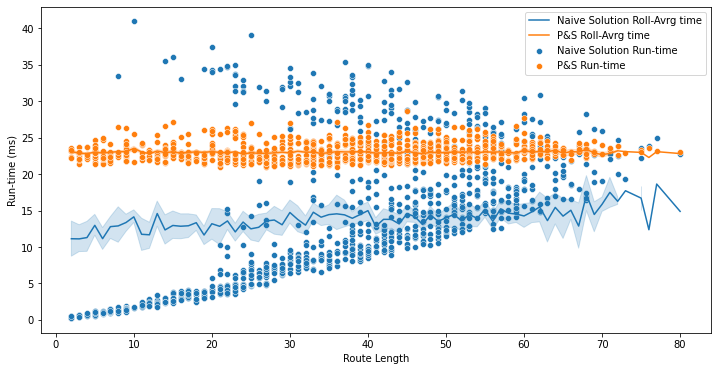

In [9]:
visualize(ps_na_df, "permute", "P&S")

In [10]:
import time

# list holding run-time of the naive solution
time_ns = []

# list holding run-time of the embed&search solution
time_es = []

# list to hold the length of generated routes
routes_lens = []

for i in range(1000):
    
    graph = app.get_data()
    
    permutation = np.random.choice(range(100), size=100, replace=False)
    
    org, dest = np.random.choice([0, 16, 76, 38, 23, 42, 43, 47, 70, 31], size=2, replace=False)
    print("--"*15)
    start_n = time.time()
    route0 = NaiveSolution.NaiveBuildRoute(org, dest, graph, list(permutation))
    end_n = time.time()
    
    start_e = time.time()
    route1 = EmbedSearch.SearchWeightedGraph(org, dest, graph, list(permutation))
    end_e = time.time()
    
    if route0 != route1:
        print(f"Routes:\n{route0}\n{route1} \nnot matching! Breaking!")
        break
    
    time_ns.append((end_n - start_n)*1000)
    time_es.append((end_e - start_e)*1000)
    routes_lens.append(len(route0))
    
    print(f"Route {i}: {route0} found!")
    print(f"Run-time naive solution: {(end_n - start_n)*1000:.3} ms")
    print(f"Run-time E&S solution: {(end_e - start_e)*1000:.3} ms")
    
es_na_df = pd.DataFrame(list(zip(time_ns, time_es, routes_lens)), columns=['naive_rt', 'embed_rt', 'route_length'])
es_na_df[ 'naive_roll_avg' ] = es_na_df.naive_rt.rolling(10).mean()
es_na_df[ 'embed_roll_avg' ] = es_na_df.embed_rt.rolling(10).mean()

print(es_na_df.head(10))

------------------------------
Route 0: [70, 80, 90, 91, 81, 71, 61, 51, 50, 40, 30, 31, 32, 33, 34, 35, 36, 37, 38, 28, 29, 39, 49, 48, 47, 57, 67, 66, 56, 46, 45, 55, 54, 64, 63, 53, 43] found!
Run-time naive solution: 8.08 ms
Run-time E&S solution: 2.25 ms
------------------------------
Route 1: [31, 41, 51, 50, 40, 30, 20, 10, 0, 1, 2, 3, 4, 14, 13, 23, 33, 32, 42, 52, 62, 72, 71, 81, 91, 92, 93, 94, 95, 96, 97, 98, 99, 89, 88, 87, 77, 78, 68, 69, 59, 49, 48, 38, 28, 27, 17, 16, 6, 5, 15, 25, 26, 36, 46, 56, 66, 65, 64, 54, 55, 45, 44, 43, 53, 63, 73, 74, 84, 85, 75, 76] found!
Run-time naive solution: 24.8 ms
Run-time E&S solution: 6.04 ms
------------------------------
Route 2: [31, 30, 20, 10, 0, 1, 2, 3, 4, 14, 24, 23, 33, 43, 42, 52, 62, 72, 82, 81, 91, 92, 93, 94, 95, 96, 86, 85, 75, 74, 64, 65, 66, 76] found!
Run-time naive solution: 9.26 ms
Run-time E&S solution: 2.11 ms
------------------------------
Route 3: [16, 17, 7, 8, 18, 19, 29, 39, 38, 48, 47, 46, 45, 35, 25, 15, 5

------------------------------
Route 32: [23, 24, 14, 4, 3, 2, 12, 22, 21, 11, 10, 0] found!
Run-time naive solution: 2.31 ms
Run-time E&S solution: 1.43 ms
------------------------------
Route 33: [16, 15, 25, 24, 23, 22, 32, 33, 43, 44, 45, 55, 54, 53, 52, 51, 41, 40, 30, 31, 21, 11, 10, 0, 1, 2, 12, 13, 3, 4, 5, 6, 7, 8, 9, 19, 29, 39, 38] found!
Run-time naive solution: 7.15 ms
Run-time E&S solution: 2.33 ms
------------------------------
Route 34: [23, 24, 25, 35, 45, 44, 54, 53, 52, 42] found!
Run-time naive solution: 2.04 ms
Run-time E&S solution: 1.1 ms
------------------------------
Route 35: [0, 10, 20, 30, 40, 41, 42, 32, 33, 34, 24, 25, 15, 16] found!
Run-time naive solution: 2.41 ms
Run-time E&S solution: 1.2 ms
------------------------------
Route 36: [47, 37, 36, 46, 45, 55, 65, 66, 76, 86, 85, 75, 74, 64, 54, 44, 43, 42, 32, 31, 30, 20, 10, 11, 21, 22, 23, 24, 34, 35, 25, 26, 27, 28, 18, 19, 29, 39, 38, 48, 58, 57, 67, 77, 87, 88, 98, 97, 96, 95, 94, 93, 92, 91, 90, 80,

------------------------------
Route 66: [16, 26, 27, 17, 18, 19, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 10, 20, 30, 31, 41, 42, 43, 53, 52, 62, 61, 71, 70, 80, 81, 91, 92, 93, 94, 84, 74, 75, 76, 66, 67, 68, 69, 59, 58, 48, 47, 46, 45, 55, 54, 44, 34, 33, 23] found!
Run-time naive solution: 23.2 ms
Run-time E&S solution: 6.03 ms
------------------------------
Route 67: [0, 10, 11, 1, 2, 3, 13, 23] found!
Run-time naive solution: 1.21 ms
Run-time E&S solution: 1.11 ms
------------------------------
Route 68: [43, 33, 32, 31, 21, 11, 1, 0] found!
Run-time naive solution: 1.74 ms
Run-time E&S solution: 1.16 ms
------------------------------
Route 69: [43, 42, 32, 22, 23, 33, 34, 44, 54, 64, 74, 84, 83, 82, 92, 93, 94, 95, 96, 86, 76, 77, 78, 88, 89, 79, 69, 59, 58, 68, 67, 66, 65, 55, 56, 57, 47, 46, 36, 26, 16] found!
Run-time naive solution: 9.26 ms
Run-time E&S solution: 3.35 ms
------------------------------
Route 70: [76, 75, 74, 84, 94, 93, 92, 91, 90, 80, 70, 60, 61, 51, 41, 40, 30, 31, 32

------------------------------
Route 99: [23, 22, 21, 11, 1, 2, 3, 4, 5, 6, 16] found!
Run-time naive solution: 3.45 ms
Run-time E&S solution: 3.29 ms
------------------------------
Route 100: [43, 44, 34, 33, 23, 22, 21, 20, 30, 40, 50, 51, 52, 53, 63, 64, 74, 84, 94, 95, 96, 86, 87, 77, 67, 66, 56, 46, 36, 37, 27, 28, 18, 19, 9, 8, 7, 6, 5, 4, 3, 2, 12, 11, 1, 0] found!
Run-time naive solution: 10.8 ms
Run-time E&S solution: 3.69 ms
------------------------------
Route 101: [16, 17, 7, 8, 9, 19, 29, 39, 38, 48, 58, 57, 47] found!
Run-time naive solution: 2.17 ms
Run-time E&S solution: 1.14 ms
------------------------------
Route 102: [31, 41, 51, 50, 60, 61, 71, 72, 82, 81, 80, 90, 91, 92, 93, 94, 84, 85, 75, 65, 64, 63, 53, 52, 42, 43, 33, 23, 13, 3, 4, 14, 15, 5, 6, 16] found!
Run-time naive solution: 14.6 ms
Run-time E&S solution: 4.05 ms
------------------------------
Route 103: [42, 43] found!
Run-time naive solution: 0.246 ms
Run-time E&S solution: 0.794 ms
--------------------

------------------------------
Route 134: [43, 42, 32, 31, 30, 20, 10, 0, 1, 2, 3, 4, 5, 6, 16] found!
Run-time naive solution: 2.65 ms
Run-time E&S solution: 1.4 ms
------------------------------
Route 135: [70, 71, 81, 80, 90, 91, 92, 93, 83, 73, 72, 62, 52, 53, 54, 55, 65, 66, 67, 68, 69, 59, 58, 48, 49, 39, 29, 19, 18, 17, 7, 6, 5, 15, 14, 4, 3, 2, 1, 11, 21, 22, 23] found!
Run-time naive solution: 17.5 ms
Run-time E&S solution: 4.54 ms
------------------------------
Route 136: [23, 33, 43] found!
Run-time naive solution: 0.802 ms
Run-time E&S solution: 1.18 ms
------------------------------
Route 137: [0, 1, 2, 12, 11, 21, 31, 41, 42] found!
Run-time naive solution: 1.51 ms
Run-time E&S solution: 1.14 ms
------------------------------
Route 138: [16, 15, 25, 26, 36, 46, 47, 57, 58, 59, 69, 79, 78, 88, 89, 99, 98, 97, 96, 86, 76, 75, 74, 73, 63, 53, 52, 51, 61, 71, 72, 82, 92, 91, 90, 80, 70] found!
Run-time naive solution: 8.82 ms
Run-time E&S solution: 4.5 ms
--------------------

------------------------------
Route 169: [47, 57, 67, 77, 87, 97, 96, 95, 94, 84, 74, 73, 63, 53, 43, 33, 34, 35, 36, 26, 27, 28, 38, 48, 49, 39, 29, 19, 9, 8, 7, 6, 5, 4, 3, 13, 12, 22, 23] found!
Run-time naive solution: 23.0 ms
Run-time E&S solution: 5.93 ms
------------------------------
Route 170: [31, 21, 20, 30, 40, 41, 42, 52, 62, 63, 73, 83, 93, 94, 95, 96, 86, 87, 88, 78, 68, 69, 59, 49, 48, 47] found!
Run-time naive solution: 10.0 ms
Run-time E&S solution: 2.85 ms
------------------------------
Route 171: [43, 33, 32, 42, 41, 40, 30, 20, 21, 31] found!
Run-time naive solution: 38.9 ms
Run-time E&S solution: 10.6 ms
------------------------------
Route 172: [70, 71, 81, 91, 92, 82, 72, 73, 63, 64, 65, 55, 54, 44, 43, 53, 52, 51, 50, 40, 30, 20, 10, 0, 1, 2, 3, 4, 5, 15, 14, 24, 23, 33, 32, 31, 41, 42] found!
Run-time naive solution: 10.6 ms
Run-time E&S solution: 2.74 ms
------------------------------
Route 173: [42, 32, 22, 21, 20, 10, 0] found!
Run-time naive solution: 1.1

------------------------------
Route 204: [70, 60, 61, 51, 52, 53, 54, 55, 45, 44, 34, 33, 43, 42, 32, 31, 30, 20, 10, 0] found!
Run-time naive solution: 6.61 ms
Run-time E&S solution: 1.74 ms
------------------------------
Route 205: [38, 28, 18, 17, 7, 8, 9, 19, 29, 39, 49, 48, 47, 57, 67, 66, 65, 75, 74, 73, 83, 93, 94, 84, 85, 86, 96, 97, 87, 88, 78, 77, 76] found!
Run-time naive solution: 32.3 ms
Run-time E&S solution: 9.21 ms
------------------------------
Route 206: [0, 10, 20, 30, 31, 21, 22, 23, 24, 25, 35, 36, 37, 27, 17, 18, 19, 9, 8, 7, 6, 5, 4, 3, 2, 1, 11, 12, 13, 14, 15, 16] found!
Run-time naive solution: 32.6 ms
Run-time E&S solution: 9.37 ms
------------------------------
Route 207: [16, 15, 5, 6, 7, 8, 9, 19, 29, 39, 38, 48, 58, 59, 69, 68, 78, 77, 87, 97, 96, 86, 85, 75, 74, 84, 94, 93, 83, 82, 92, 91, 81, 71, 72, 73, 63, 64, 54, 44, 43, 42, 52, 62, 61, 60, 50, 40, 30, 31, 21, 22, 32, 33, 23] found!
Run-time naive solution: 15.0 ms
Run-time E&S solution: 4.14 ms
---

------------------------------
Route 234: [76, 86, 87, 88, 78, 79, 69, 59, 58, 57, 67, 66, 65, 75, 74, 73, 72, 82, 81, 91, 90, 80, 70, 71, 61, 62, 63, 53, 43, 42, 41, 40, 30, 20, 21, 22, 12, 2, 3, 4, 14, 15, 16] found!
Run-time naive solution: 12.7 ms
Run-time E&S solution: 3.29 ms
------------------------------
Route 235: [31, 21, 20, 10, 0, 1, 2, 3, 13, 14, 4, 5, 6, 7, 17, 27, 26, 25, 35, 34, 33, 43, 42, 52, 51, 41, 40, 50, 60, 70, 80, 81, 82, 92, 93, 83, 73, 63, 64, 65, 66, 67, 68, 78, 88, 87, 86, 76, 75, 85, 95, 96, 97, 98, 99, 89, 79, 69, 59, 49, 48, 38] found!
Run-time naive solution: 18.4 ms
Run-time E&S solution: 4.93 ms
------------------------------
Route 236: [31, 21, 11, 1, 0, 10, 20, 30, 40, 50, 51, 61, 62, 52, 42, 43] found!
Run-time naive solution: 2.58 ms
Run-time E&S solution: 1.41 ms
------------------------------
Route 237: [23, 22, 21, 11, 1, 0, 10, 20, 30, 40, 41, 42, 43] found!
Run-time naive solution: 2.13 ms
Run-time E&S solution: 1.27 ms
-----------------------

------------------------------
Route 265: [23, 24, 34, 44, 45, 55, 56, 57, 58, 48, 49, 59, 69, 79, 89, 88, 87, 86, 96, 95, 94, 93, 92, 82, 83, 73, 74, 75, 65, 64, 63, 53, 52, 62, 61, 51, 50, 40, 30, 20, 10, 0] found!
Run-time naive solution: 13.7 ms
Run-time E&S solution: 4.3 ms
------------------------------
Route 266: [23, 22, 12, 2, 3, 4, 14, 24, 25, 35, 45, 55, 56, 66, 65, 75, 76, 77, 78, 79, 89, 99, 98, 97, 96, 95, 94, 84, 83, 73, 63, 62, 52, 42, 41, 40, 30, 31] found!
Run-time naive solution: 7.85 ms
Run-time E&S solution: 2.3 ms
------------------------------
Route 267: [43, 44, 54, 64, 65, 55, 45, 46, 36, 37, 27, 17, 18, 8, 7, 6, 16, 26, 25, 24, 23, 13, 3, 2, 12, 11, 21, 31, 32, 42, 52, 51, 50, 60, 61, 71, 72, 82, 83, 73, 74, 75, 76] found!
Run-time naive solution: 18.5 ms
Run-time E&S solution: 4.82 ms
------------------------------
Route 268: [42, 32, 33, 34, 35, 36, 37, 38, 39, 29, 28, 18, 17, 7, 6, 5, 15, 16, 26, 25, 24, 23, 22, 21, 11, 1, 0, 10, 20, 30, 31, 41, 51, 50, 60,

------------------------------
Route 297: [16, 17, 18, 19, 29, 39, 38, 28, 27, 37, 47] found!
Run-time naive solution: 1.62 ms
Run-time E&S solution: 1.12 ms
------------------------------
Route 298: [76, 86, 87, 97, 98, 99, 89, 79, 69, 59, 49, 48, 58, 57, 67, 66, 65, 55, 54, 44, 43, 33, 32, 31, 41, 51, 52, 53, 63, 62, 61, 60, 70] found!
Run-time naive solution: 26.5 ms
Run-time E&S solution: 7.37 ms
------------------------------
Route 299: [47, 46, 36, 35, 25, 26, 16, 17, 18, 19, 29, 39, 38, 48, 58, 59, 69, 68, 78, 88, 98, 97, 96, 95, 85, 84, 83, 93, 92, 91, 81, 80, 70, 60, 50, 51, 41, 42, 43, 33, 32, 22, 21, 20, 10, 11, 12, 13, 3, 4, 5, 15, 14, 24, 23] found!
Run-time naive solution: 13.5 ms
Run-time E&S solution: 3.72 ms
------------------------------
Route 300: [23, 13, 12, 11, 21, 20, 10, 0, 1, 2, 3, 4, 5, 15, 25, 35, 34, 44, 54, 53, 52, 62, 72, 73, 83, 84, 94, 95, 96, 86, 76, 77, 67, 68, 58, 59, 49, 39, 29, 28, 38] found!
Run-time naive solution: 12.3 ms
Run-time E&S solution: 3

------------------------------
Route 328: [42, 43, 53, 52, 62, 72, 73, 83, 84, 94, 95, 96, 86, 76, 66, 65, 75, 74, 64, 54, 55, 45, 35, 34, 24, 25, 15, 5, 4, 14, 13, 12, 22, 23, 33, 32, 31, 41, 51, 50, 60, 70] found!
Run-time naive solution: 26.8 ms
Run-time E&S solution: 7.69 ms
------------------------------
Route 329: [76, 77, 87, 88, 98, 99, 89, 79, 78, 68, 58, 48, 49, 39, 29, 28, 27, 17, 7, 6, 5, 4, 3, 13, 14, 15, 25, 26, 36, 37, 47, 57, 56, 66, 65, 64, 54, 53, 52, 62, 72, 73, 83, 84, 74, 75, 85, 95, 94, 93, 92, 91, 81, 80, 70, 60, 50, 40, 30, 31] found!
Run-time naive solution: 17.0 ms
Run-time E&S solution: 4.22 ms
------------------------------
Route 330: [38, 28, 18, 17, 7, 6, 16, 26, 27, 37, 47, 46, 56, 55, 54, 64, 74, 73, 83, 82, 72, 62, 61, 51, 41, 31, 32, 33, 23, 13, 12, 11, 21, 20, 10, 0] found!
Run-time naive solution: 9.31 ms
Run-time E&S solution: 2.29 ms
------------------------------
Route 331: [43, 44, 45, 35, 36, 26, 16, 6, 7, 17, 18, 28, 38] found!
Run-time naive s

------------------------------
Route 360: [76, 66, 65, 55, 45, 35, 25, 15, 16, 6, 7, 8, 9, 19, 18, 17, 27, 37, 38, 48, 58, 68, 78, 88, 89, 99, 98, 97, 87, 86, 85, 95, 94, 84, 83, 73, 72, 62, 52, 51, 41, 40, 30, 31] found!
Run-time naive solution: 15.8 ms
Run-time E&S solution: 4.82 ms
------------------------------
Route 361: [31, 21, 20, 30, 40, 50, 51, 41, 42, 32, 22, 23] found!
Run-time naive solution: 1.71 ms
Run-time E&S solution: 1.3 ms
------------------------------
Route 362: [47, 48, 38, 39, 29, 19, 18, 8, 7, 6, 5, 15, 25, 26, 27, 37, 36, 46, 56, 55, 54, 44, 43, 33, 32, 22, 23] found!
Run-time naive solution: 7.2 ms
Run-time E&S solution: 2.11 ms
------------------------------
Route 363: [42, 32, 31] found!
Run-time naive solution: 0.917 ms
Run-time E&S solution: 1.72 ms
------------------------------
Route 364: [76, 75, 74, 73, 72, 62, 63, 64, 54, 44, 43, 42, 41, 31, 21, 11, 10, 0, 1, 2, 12, 22, 23, 33, 34, 24, 14, 15, 16, 26, 36, 37, 38, 28, 18, 17, 7, 8, 9, 19, 29, 39, 49, 

------------------------------
Route 394: [16, 15, 25, 35, 34, 33, 43, 53, 63, 62, 52, 51, 50, 60, 70, 71, 72, 73, 74, 75, 76, 77, 87, 97, 98, 99, 89, 79, 69, 59, 49, 39, 38, 37, 27, 28, 18, 17, 7, 6, 5, 4, 3, 2, 12, 11, 21, 20, 30, 31, 41, 42] found!
Run-time naive solution: 13.7 ms
Run-time E&S solution: 3.77 ms
------------------------------
Route 395: [42, 52, 51, 41, 31, 32, 22, 21, 11, 1, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 91, 92, 82, 83, 84, 85, 95, 96, 97, 98, 99, 89, 79, 69, 59, 58, 48, 47] found!
Run-time naive solution: 7.69 ms
Run-time E&S solution: 2.21 ms
------------------------------
Route 396: [76, 77, 67, 68, 69, 59, 49, 48, 47, 37, 36, 46, 45, 55, 65, 64, 74, 84, 83, 93, 92, 82, 81, 80, 70, 60, 61, 62, 72, 73, 63, 53, 43, 33, 23, 24, 14, 15, 16, 17, 27, 28, 29, 19, 18, 8, 7, 6, 5, 4, 3, 2, 12, 11, 21, 20, 10, 0] found!
Run-time naive solution: 20.6 ms
Run-time E&S solution: 4.97 ms
------------------------------
Route 397: [42, 32, 33, 23, 24, 25, 26, 36, 37, 38,

------------------------------
Route 427: [70, 71, 72, 73, 83, 82, 92, 93, 94, 95, 85, 86, 76, 66, 65, 75, 74, 64, 54, 53, 43, 42, 32, 33, 23, 24, 14, 13, 3, 4, 5, 6, 16, 17, 18, 28, 29, 39, 49, 59, 58, 57, 47] found!
Run-time naive solution: 18.6 ms
Run-time E&S solution: 5.92 ms
------------------------------
Route 428: [70, 80, 81, 82, 92, 93, 94, 95, 85, 75, 65, 64, 63, 53, 43] found!
Run-time naive solution: 3.22 ms
Run-time E&S solution: 1.89 ms
------------------------------
Route 429: [70, 71, 81, 80, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 89, 79, 78, 88, 87, 77, 76, 75, 65, 55, 54, 44, 43, 42] found!
Run-time naive solution: 4.55 ms
Run-time E&S solution: 2.47 ms
------------------------------
Route 430: [0, 1, 11, 12, 22, 23, 33, 34, 44, 54, 64, 74, 73, 83, 82, 72, 71, 70] found!
Run-time naive solution: 4.15 ms
Run-time E&S solution: 2.16 ms
------------------------------
Route 431: [70, 60, 50, 51, 52, 53, 63, 73, 83, 93, 94, 95, 85, 84, 74, 64, 54, 44, 34, 35, 25, 24, 14,

Route 458: [43, 44, 34, 24, 25, 15, 16, 26, 36, 37, 38, 48, 49, 59, 69, 68, 78, 77, 87, 86, 85, 75, 65, 64, 54, 53, 52, 51, 50, 40, 30, 31, 32, 42] found!
Run-time naive solution: 12.8 ms
Run-time E&S solution: 3.46 ms
------------------------------
Route 459: [38, 37, 27, 17, 18, 28, 29, 19, 9, 8, 7, 6, 5, 4, 3, 13, 23] found!
Run-time naive solution: 2.67 ms
Run-time E&S solution: 1.33 ms
------------------------------
Route 460: [23, 22, 21, 20, 10, 0, 1, 2, 3, 4, 5, 15, 16] found!
Run-time naive solution: 2.12 ms
Run-time E&S solution: 1.16 ms
------------------------------
Route 461: [38, 28, 29, 19, 9, 8, 7, 17, 16, 15, 5, 4, 14, 13, 23, 22, 32, 31, 21, 11, 10, 20, 30, 40, 41, 51, 52, 53, 43, 42] found!
Run-time naive solution: 36.1 ms
Run-time E&S solution: 9.83 ms
------------------------------
Route 462: [42, 43, 53, 63, 73, 83, 93, 94, 84, 74, 64, 54, 44, 45, 35, 34, 24, 25, 15, 5, 4, 14, 13, 3, 2, 1, 11, 10, 20, 30, 40, 50, 60, 61, 71, 81, 91, 90, 80, 70] found!
Run-time nai

------------------------------
Route 492: [23, 13, 14, 15, 16, 6, 7, 8, 9, 19, 29, 39, 38, 37, 47, 57, 56, 66, 76, 77, 78, 79, 89, 88, 87, 97, 96, 86, 85, 84, 74, 64, 63, 53, 52, 42, 32, 33, 43] found!
Run-time naive solution: 11.6 ms
Run-time E&S solution: 3.01 ms
------------------------------
Route 493: [42, 32, 31, 21, 11, 12, 2, 3, 4, 14, 15, 5, 6, 16] found!
Run-time naive solution: 2.73 ms
Run-time E&S solution: 1.25 ms
------------------------------
Route 494: [42, 52, 51, 50, 60, 70, 80, 90, 91, 92, 82, 81, 71, 72, 62, 63, 73, 83, 84, 85, 75, 65, 55, 54, 44, 45, 46, 36, 37, 27, 26, 25, 35, 34, 33, 23, 13, 12, 2, 1, 0] found!
Run-time naive solution: 9.91 ms
Run-time E&S solution: 4.42 ms
------------------------------
Route 495: [43, 53, 63, 64, 74, 73, 72, 82, 81, 91, 92, 93, 94, 84, 85, 86, 87, 77, 67, 68, 69, 59, 58, 48, 38] found!
Run-time naive solution: 8.63 ms
Run-time E&S solution: 3.5 ms
------------------------------
Route 496: [0, 1, 11, 10, 20, 21, 22, 32, 42, 52, 

------------------------------
Route 523: [43, 44, 45, 55, 65, 64, 63, 53, 52, 51, 61, 60, 70, 80, 90, 91, 81, 82, 83, 93, 94, 95, 96, 97, 87, 77, 76, 66, 56, 46, 47, 48, 58, 59, 49, 39, 29, 28, 18, 8, 7, 6, 16, 26, 25, 15, 14, 13, 3, 2, 1, 11, 12, 22, 23, 33, 32, 31, 30, 40, 41, 42] found!
Run-time naive solution: 20.0 ms
Run-time E&S solution: 4.77 ms
------------------------------
Route 524: [43, 42, 41, 51, 50, 40, 30, 20, 21, 22, 32, 33, 23, 24, 14, 13, 12, 2, 1, 11, 10, 0] found!
Run-time naive solution: 3.54 ms
Run-time E&S solution: 2.41 ms
------------------------------
Route 525: [23, 13, 14, 24, 25, 15, 5, 6, 16, 17, 27, 28, 38, 37, 36, 46, 45, 55, 65, 64, 54, 44, 34, 33, 43, 42, 41, 40, 30, 31] found!
Run-time naive solution: 6.55 ms
Run-time E&S solution: 1.92 ms
------------------------------
Route 526: [42, 32, 22, 23, 13, 3, 4, 5, 6, 16, 15, 25, 35, 45, 46, 56, 66, 76] found!
Run-time naive solution: 3.54 ms
Run-time E&S solution: 1.34 ms
------------------------------


Route 553: [70, 71, 61, 62, 52, 51, 50, 40, 41, 31, 21, 11, 1, 2, 12, 13, 14, 4, 5, 15, 16] found!
Run-time naive solution: 4.26 ms
Run-time E&S solution: 3.26 ms
------------------------------
Route 554: [70, 71, 81, 82, 92, 93, 94, 95, 85, 86, 87, 97, 98, 99, 89, 79, 78, 77, 76, 66, 56, 46, 36, 37, 38, 48, 58, 57, 67, 68, 69, 59, 49, 39, 29, 28, 18, 8, 7, 17, 16, 26, 25, 24, 34, 33, 23, 13, 12, 11, 10, 20, 21, 31, 32, 42] found!
Run-time naive solution: 15.0 ms
Run-time E&S solution: 4.62 ms
------------------------------
Route 555: [47, 48, 58, 68, 67, 77, 76, 75, 65, 55, 54, 53, 43, 44, 34, 33, 32, 31, 41, 51, 50, 40, 30, 20, 21, 11, 12, 13, 14, 15, 16] found!
Run-time naive solution: 6.82 ms
Run-time E&S solution: 1.97 ms
------------------------------
Route 556: [76, 75, 85, 86, 96, 97, 98, 99, 89, 88, 87, 77, 67, 68, 58, 59, 49, 48, 47, 57, 56, 46, 36, 35, 45, 44, 43, 33, 23, 24, 14, 4, 5, 15, 25, 26, 27, 17, 18, 8, 9, 19, 29, 39, 38] found!
Run-time naive solution: 10.6 ms
Run-

------------------------------
Route 586: [23, 13, 3, 2, 1, 0, 10, 11, 21, 31, 41, 40, 50, 60, 70, 71, 81, 82, 83, 73, 74, 84, 94, 95, 96, 86, 85, 75, 76, 66, 67, 77, 87, 88, 78, 79, 69, 59, 49, 48, 38, 39, 29, 19, 9, 8, 18, 17, 27, 26, 36, 46, 45, 35, 25, 24, 34, 44, 43, 53, 63, 64, 65, 55, 56, 57, 47] found!
Run-time naive solution: 27.2 ms
Run-time E&S solution: 6.87 ms
------------------------------
Route 587: [31, 21, 22, 32, 42, 43] found!
Run-time naive solution: 1.11 ms
Run-time E&S solution: 0.943 ms
------------------------------
Route 588: [38, 39, 49, 48, 47, 46, 56, 66, 76, 86, 85, 95, 94, 93, 92, 91, 81, 71, 72, 62, 61, 60, 50, 40, 41, 31, 32, 42, 43, 53, 54, 64, 65, 55, 45, 35, 25, 26, 27, 17, 18, 28, 29, 19, 9, 8, 7, 6, 5, 4, 14, 13, 12, 11, 1, 0] found!
Run-time naive solution: 15.8 ms
Run-time E&S solution: 4.13 ms
------------------------------
Route 589: [38, 48, 49, 59, 69, 79, 89, 88, 87, 77, 78, 68, 58, 57, 47, 46, 56, 55, 65, 75, 85, 95, 94, 93, 92, 82, 72, 73, 

------------------------------
Route 620: [23, 13, 3, 4, 14, 15, 25, 35, 45, 46, 47, 37, 27, 17, 7, 8, 9, 19, 29, 39, 49, 59, 58, 68, 69, 79, 89, 99, 98, 97, 96, 86, 76, 75, 65, 55, 54, 64, 63, 73, 83, 82, 72, 62, 61, 60, 70] found!
Run-time naive solution: 27.3 ms
Run-time E&S solution: 7.1 ms
------------------------------
Route 621: [43, 53, 54, 64, 74, 84, 94, 95, 96, 97, 98, 88, 78, 79, 69, 59, 49, 39, 29, 19, 9, 8, 7, 17, 16, 15, 5, 4, 3, 2, 1, 11, 10, 0] found!
Run-time naive solution: 7.68 ms
Run-time E&S solution: 2.12 ms
------------------------------
Route 622: [43, 42, 52, 62, 72, 73, 83, 93, 92, 91, 90, 80, 70, 60, 50, 51, 41, 31, 30, 20, 10, 0, 1, 11, 12, 13, 23, 33, 34, 35, 45, 46, 36, 37, 27, 26, 25, 24, 14, 4, 5, 6, 7, 8, 18, 19, 29, 39, 49, 48, 38] found!
Run-time naive solution: 30.6 ms
Run-time E&S solution: 7.76 ms
------------------------------
Route 623: [76, 75, 74, 84, 85, 95, 96, 97, 98, 99, 89, 79, 69, 68, 67, 57, 56, 55, 54, 44, 43, 53, 63, 62, 61, 60, 50, 4

Route 653: [38, 28, 18, 8, 7, 6, 16, 15, 25, 35, 34, 44, 43, 42, 41, 40, 30, 20, 10, 11, 12, 2, 1, 0] found!
Run-time naive solution: 33.8 ms
Run-time E&S solution: 10.4 ms
------------------------------
Route 654: [43, 44, 54, 64, 74, 73, 83, 82, 81, 71, 70, 60, 50, 40, 30, 31, 21, 11, 12, 2, 3, 4, 14, 15, 16, 26, 25, 24, 23, 33, 34, 35, 45, 55, 65, 66, 67, 57, 47, 37, 27, 28, 38, 48, 49, 59, 69, 79, 89, 99, 98, 88, 87, 86, 76] found!
Run-time naive solution: 13.5 ms
Run-time E&S solution: 4.54 ms
------------------------------
Route 655: [0, 10, 20, 30, 31, 41, 51, 52, 53, 63, 62, 72, 71, 61, 60, 70, 80, 90, 91, 92, 82, 83, 84, 74, 64, 65, 55, 56, 57, 47] found!
Run-time naive solution: 6.79 ms
Run-time E&S solution: 1.87 ms
------------------------------
Route 656: [0, 10, 20, 30, 40, 41, 31, 21, 22, 12, 2, 3, 13, 23, 24, 34, 44, 54, 53, 52, 62, 72, 73, 74, 64, 65, 66, 67, 68, 78, 79, 89, 88, 87, 97, 96, 95, 94, 84, 83, 93, 92, 91, 81, 71, 70] found!
Run-time naive solution: 14.3 ms

------------------------------
Route 682: [31, 21, 11, 1, 0] found!
Run-time naive solution: 1.04 ms
Run-time E&S solution: 1.03 ms
------------------------------
Route 683: [47, 46, 45, 55, 54, 64, 65, 66, 67, 57, 58, 48, 38, 39, 29, 19, 18, 28, 27, 37, 36, 35, 34, 33, 43, 42, 41, 31, 21, 11, 10, 20, 30, 40, 50, 60, 61, 62, 52, 53, 63, 73, 83, 93, 94, 95, 85, 86, 96, 97, 98, 99, 89, 79, 78, 77, 76] found!
Run-time naive solution: 24.1 ms
Run-time E&S solution: 6.45 ms
------------------------------
Route 684: [31, 21, 22, 23, 33, 34, 35, 45, 44, 54, 55, 65, 75, 76, 77, 87, 97, 96, 86, 85, 84, 94, 93, 83, 73, 72, 71, 81, 80, 70, 60, 50, 40, 30, 20, 10, 0, 1, 11, 12, 13, 3, 4, 14, 15, 16] found!
Run-time naive solution: 11.8 ms
Run-time E&S solution: 3.3 ms
------------------------------
Route 685: [23, 13, 14, 15, 25, 35, 34, 33, 32, 42, 43, 44, 54, 64, 65, 66, 76, 86, 87, 77, 78, 68, 58, 59, 69, 79, 89, 99, 98, 97, 96, 95, 85, 75, 74, 84, 83, 82, 81, 91, 90, 80, 70] found!
Run-time na

------------------------------
Route 715: [23, 33, 43, 42, 52, 53, 54, 64, 74, 73, 72, 71, 61, 60, 50, 40, 41, 31, 32, 22, 12, 11, 10, 0, 1, 2, 3, 4, 14, 15, 5, 6, 7, 8, 18, 28, 27, 37, 47, 48, 49, 59, 69, 68, 67, 66, 56, 46, 45, 55, 65, 75, 85, 86, 96, 97, 98, 99, 89, 79, 78, 77, 76] found!
Run-time naive solution: 26.1 ms
Run-time E&S solution: 8.12 ms
------------------------------
Route 716: [23, 33, 43, 42, 41, 40, 50, 51, 61, 62, 52, 53, 63, 73, 74, 84, 85, 95, 96, 97, 98, 99, 89, 79, 78, 77, 87, 86, 76, 66, 65, 55, 45, 46, 36, 35, 25, 24, 14, 4, 5, 15, 16] found!
Run-time naive solution: 10.6 ms
Run-time E&S solution: 2.79 ms
------------------------------
Route 717: [16, 26, 27, 17, 18, 8, 7, 6, 5, 4, 3, 13, 12, 22, 21, 20, 10, 11, 1, 0] found!
Run-time naive solution: 3.5 ms
Run-time E&S solution: 2.15 ms
------------------------------
Route 718: [70, 60, 50, 40, 30, 31, 21, 22, 12, 11, 10, 0, 1, 2, 3, 13, 14, 15, 16] found!
Run-time naive solution: 3.21 ms
Run-time E&S soluti

------------------------------
Route 749: [47, 37, 38, 39, 29, 19, 18, 8, 7, 6, 16] found!
Run-time naive solution: 1.98 ms
Run-time E&S solution: 1.19 ms
------------------------------
Route 750: [42, 41, 40, 30, 20, 10, 0, 1, 11, 21, 22, 23, 13, 3, 4, 14, 24, 34, 35, 36, 37, 27, 28, 38, 48, 49, 39, 29, 19, 9, 8, 7, 6, 16] found!
Run-time naive solution: 30.9 ms
Run-time E&S solution: 9.64 ms
------------------------------
Route 751: [16, 15, 5, 6, 7, 17, 27, 26, 36, 46, 47, 57, 58, 59, 69, 79, 89, 99, 98, 97, 87, 86, 76, 66, 56, 55, 54, 44, 45, 35, 34, 33, 23, 13, 14, 4, 3, 2, 1, 0] found!
Run-time naive solution: 12.4 ms
Run-time E&S solution: 3.9 ms
------------------------------
Route 752: [42, 43, 33, 34, 35, 45, 44, 54, 55, 56, 66, 67, 77, 87, 88, 98, 97, 96, 86, 85, 84, 83, 73, 72, 71, 81, 80, 70, 60, 50, 51, 41, 31, 32, 22, 23, 13, 3, 4, 14, 15, 16] found!
Run-time naive solution: 16.4 ms
Run-time E&S solution: 4.38 ms
------------------------------
Route 753: [31, 30, 20, 10,

------------------------------
Route 781: [31, 21, 20, 30, 40, 41, 51, 61, 60, 70, 71, 72, 82, 92, 93, 94, 95, 96, 86, 76, 75, 74, 64, 65, 66, 67, 68, 69, 59, 49, 39, 38, 37, 47, 57, 56, 46, 45, 44, 34, 33, 32, 42, 52, 53, 43] found!
Run-time naive solution: 13.2 ms
Run-time E&S solution: 3.7 ms
------------------------------
Route 782: [76, 75, 65, 64, 63, 73, 72, 71, 70, 60, 50, 40, 41, 31, 32, 33, 34, 44, 43, 42, 52, 53, 54, 55, 56, 57, 67, 68, 78, 88, 98, 99, 89, 79, 69, 59, 49, 48, 38] found!
Run-time naive solution: 9.81 ms
Run-time E&S solution: 2.96 ms
------------------------------
Route 783: [38, 48, 47, 57, 58, 68, 78, 88, 89, 79, 69, 59, 49, 39, 29, 19, 9, 8, 7, 6, 5, 15, 25, 26, 27, 37, 36, 35, 34, 44, 45, 55, 65, 66, 76, 86, 85, 84, 94, 93, 83, 73, 74, 64, 63, 62, 52, 53, 43, 33, 32, 31, 21, 20, 10, 0] found!
Run-time naive solution: 27.5 ms
Run-time E&S solution: 6.71 ms
------------------------------
Route 784: [43, 33, 32, 22, 12, 11, 1, 0, 10, 20, 30, 40, 41, 51, 52, 

Route 810: [70, 80, 81, 71, 72, 73, 83, 84, 85, 75, 65, 66, 56, 57, 47, 37, 36, 35, 45, 44, 34, 24, 14, 13, 12, 22, 32, 31, 30, 20, 21, 11, 1, 2, 3, 4, 5, 15, 16, 17, 18, 8, 9, 19, 29, 39, 49, 59, 58, 48, 38] found!
Run-time naive solution: 24.1 ms
Run-time E&S solution: 6.97 ms
------------------------------
Route 811: [42, 32, 31, 21, 11, 12, 2, 1, 0, 10, 20, 30, 40, 50, 60, 70, 71, 72, 73, 74, 75, 76, 66, 65, 55, 45, 35, 36, 37, 27, 26, 16, 15, 14, 4, 3, 13, 23] found!
Run-time naive solution: 30.0 ms
Run-time E&S solution: 7.9 ms
------------------------------
Route 812: [23, 22, 21, 11, 1, 2, 3, 13, 14, 4, 5, 15, 25, 24, 34, 33, 32, 42, 52, 51, 50, 60, 61, 62, 63, 53, 54, 64, 65, 75, 85, 86, 96, 97, 87, 88, 78, 68, 69, 59, 49, 39, 38, 28, 27, 37, 47] found!
Run-time naive solution: 10.4 ms
Run-time E&S solution: 3.52 ms
------------------------------
Route 813: [0, 1, 2, 12, 22, 21, 20, 30, 40, 41, 42, 32, 33, 23, 13, 3, 4, 5, 6, 16, 17, 7, 8, 9, 19, 18, 28, 27, 26, 36, 35, 25, 15

------------------------------
Route 840: [42, 52, 62, 63, 64, 74, 84, 94, 93, 92, 91, 90, 80, 70, 71, 61, 51, 41, 31, 21, 22, 12, 13, 14, 15, 25, 35, 45, 55, 56, 66, 67, 57, 47] found!
Run-time naive solution: 9.0 ms
Run-time E&S solution: 2.55 ms
------------------------------
Route 841: [23, 22, 32, 42, 41, 40, 30, 20, 10, 11, 12, 2, 3, 4, 14, 24, 25, 15, 16, 6, 7, 17, 27, 37, 36, 46, 45, 35, 34, 44, 54, 53, 43] found!
Run-time naive solution: 33.5 ms
Run-time E&S solution: 9.17 ms
------------------------------
Route 842: [0, 1, 2, 3, 13, 14, 24, 34, 33, 23, 22, 12, 11, 21, 31, 41, 51, 52, 62, 63, 73, 74, 84, 94, 95, 96, 97, 98, 88, 78, 68, 58, 48, 49, 39, 38, 28, 18, 17, 7, 6, 5, 15, 25, 35, 36, 37, 47] found!
Run-time naive solution: 17.6 ms
Run-time E&S solution: 4.56 ms
------------------------------
Route 843: [70, 80, 81, 82, 92, 93, 94, 95, 96, 97, 98, 99, 89, 79, 69, 68, 58, 57, 56, 55, 65, 64, 74, 84, 83, 73, 63, 53, 52, 51, 61, 60, 50, 40, 30, 31, 21, 20, 10, 0, 1, 2, 3, 

Route 870: [47, 57, 58, 59, 69, 79, 89, 88, 87, 77, 67, 66, 65, 55, 54, 44, 34, 33, 32, 22, 23, 24, 25, 15, 5, 4, 3, 2, 12, 11, 21, 20, 10, 0] found!
Run-time naive solution: 34.7 ms
Run-time E&S solution: 8.97 ms
------------------------------
Route 871: [43, 33, 23, 22, 21, 31, 41, 51, 50, 40, 30, 20, 10, 0, 1, 2, 3, 13, 14, 15, 25, 26, 36, 35, 45, 44, 54, 53, 52, 62, 72, 82, 81, 80, 90, 91, 92, 93, 94, 84, 74, 73, 63, 64, 65, 55, 56, 57, 47] found!
Run-time naive solution: 14.5 ms
Run-time E&S solution: 3.64 ms
------------------------------
Route 872: [31, 30, 40, 41, 51, 61, 71, 70, 80, 90, 91, 92, 82, 83, 73, 74, 64, 63, 53, 54, 55, 56, 46, 36, 35, 34, 33, 23, 22, 12, 11, 10, 0] found!
Run-time naive solution: 9.39 ms
Run-time E&S solution: 2.54 ms
------------------------------
Route 873: [23, 33, 34, 35, 36, 26, 16, 17, 27, 37, 38, 39, 29, 28, 18, 8, 7, 6, 5, 4, 14, 13, 12, 11, 1, 0, 10, 20, 30, 31, 41, 42, 43, 53, 63, 62, 61, 71, 81, 82, 83, 93, 92, 91, 90, 80, 70] found!
Run-

------------------------------
Route 901: [47, 48, 49, 39, 29, 19, 9, 8, 7, 6, 5, 4, 14, 13, 12, 2, 1, 0, 10, 20, 30, 40, 41, 51, 61, 71, 72, 62, 63, 73, 74, 75, 65, 66, 76, 77, 87, 97, 98, 99, 89, 79, 69, 59, 58, 57, 56, 46, 45, 35, 25, 24, 23, 33, 32, 42, 43] found!
Run-time naive solution: 27.1 ms
Run-time E&S solution: 6.88 ms
------------------------------
Route 902: [0, 1, 2, 3, 4, 5, 15, 16, 17, 18, 19, 29, 28, 38, 37, 47] found!
Run-time naive solution: 3.02 ms
Run-time E&S solution: 1.77 ms
------------------------------
Route 903: [38, 48, 47] found!
Run-time naive solution: 0.624 ms
Run-time E&S solution: 0.907 ms
------------------------------
Route 904: [31, 32, 33, 23, 13, 14, 4, 5, 6, 7, 8, 18, 28, 27, 37, 47] found!
Run-time naive solution: 3.03 ms
Run-time E&S solution: 1.27 ms
------------------------------
Route 905: [70, 60, 50, 40, 30, 20, 21, 11, 12, 2, 3, 4, 14, 24, 34, 35, 36, 26, 27, 17, 7, 6, 16] found!
Run-time naive solution: 32.7 ms
Run-time E&S solution: 1

------------------------------
Route 935: [42, 43, 44, 45, 35, 25, 26, 16, 6, 7, 8, 9, 19, 29, 28, 38, 48, 49, 59, 58, 68, 67, 77, 78, 79, 89, 88, 87, 97, 96, 95, 85, 75, 74, 64, 63, 73, 83, 93, 92, 91, 90, 80, 70, 60, 50, 51, 52, 53, 54, 55, 65, 66, 76] found!
Run-time naive solution: 12.6 ms
Run-time E&S solution: 3.39 ms
------------------------------
Route 936: [76, 86, 87, 97, 98, 99, 89, 88, 78, 68, 58, 48, 47, 46, 45, 44, 54, 64, 74, 84, 94, 93, 92, 82, 81, 91, 90, 80, 70, 60, 50, 40, 41, 42] found!
Run-time naive solution: 8.6 ms
Run-time E&S solution: 2.16 ms
------------------------------
Route 937: [38, 48, 49, 39, 29, 28, 27, 26, 16, 6, 5, 4, 14, 13, 23, 33, 32, 31] found!
Run-time naive solution: 3.37 ms
Run-time E&S solution: 1.45 ms
------------------------------
Route 938: [70, 71, 81, 91, 92, 82, 72, 62, 61, 60, 50, 40, 30, 20, 10, 0, 1, 11, 12, 22, 21, 31, 41, 42, 43] found!
Run-time naive solution: 4.44 ms
Run-time E&S solution: 2.41 ms
------------------------------

------------------------------
Route 968: [43, 53, 63, 62, 61, 60, 50, 40, 41, 42, 32, 31, 21, 11, 1, 2, 3, 13, 23, 33, 34, 44, 45, 35, 25, 15, 16, 17, 7, 8, 18, 28, 38, 39, 49, 48, 58, 68, 67, 77, 76, 75, 65, 64, 74, 73, 83, 82, 81, 80, 70] found!
Run-time naive solution: 24.3 ms
Run-time E&S solution: 6.6 ms
------------------------------
Route 969: [23, 33, 32, 42, 52, 53, 54, 64, 74, 73, 72, 82, 92, 91, 81, 71, 70, 60, 61, 51, 41, 31, 21, 20, 10, 11, 1, 2, 3, 13, 14, 15, 5, 6, 16, 17, 27, 28, 18, 19, 29, 39, 49, 59, 69, 68, 78, 88, 89, 99, 98, 97, 87, 86, 76, 66, 67, 57, 47, 46, 36, 26, 25, 35, 45, 44, 43] found!
Run-time naive solution: 18.6 ms
Run-time E&S solution: 4.75 ms
------------------------------
Route 970: [23, 33, 34, 35, 25, 26, 16, 6, 5, 4, 3, 2, 1, 11, 21, 31, 41, 42, 43, 53, 63, 73, 72, 82, 81, 80, 90, 91, 92, 93, 94, 95, 96, 97, 98, 88, 78, 68, 69, 59, 49, 39, 29, 19, 18, 8, 7, 17, 27, 28, 38] found!
Run-time naive solution: 11.1 ms
Run-time E&S solution: 3.1 ms
--

Route 999: [16, 17, 27, 26, 36, 35, 45, 44, 43, 53, 52, 62, 61, 71, 70, 60, 50, 51, 41, 31, 30, 20, 21, 22, 32, 33, 23, 24, 14, 13, 3, 4, 5, 6, 7, 8, 18, 19, 29, 39, 38, 48, 58, 59, 69, 79, 78, 88, 87, 86, 96, 95, 85, 84, 74, 75, 76, 66, 56, 57, 47] found!
Run-time naive solution: 27.8 ms
Run-time E&S solution: 8.28 ms
    naive_rt  embed_rt  route_length  naive_roll_avg  embed_roll_avg
0   8.079529  2.249241            37             NaN             NaN
1  24.813652  6.035328            72             NaN             NaN
2   9.261608  2.111912            34             NaN             NaN
3  22.876978  6.636858            50             NaN             NaN
4   0.724077  1.019239             4             NaN             NaN
5   1.744986  1.089811            11             NaN             NaN
6  21.813631  6.273985            69             NaN             NaN
7   4.314423  1.683712            25             NaN             NaN
8   4.001856  2.356052            19             NaN      

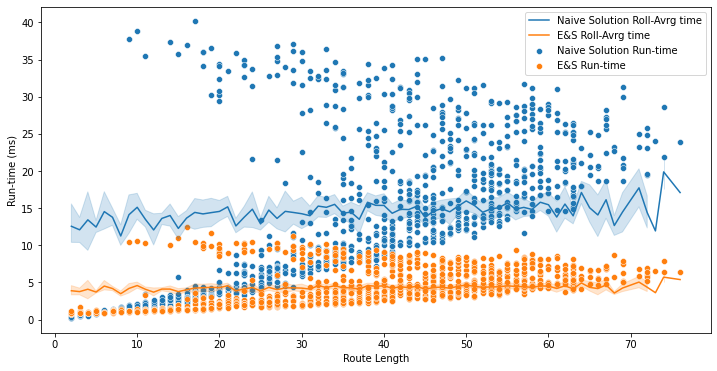

In [11]:
visualize(es_na_df, "embed", "E&S")

In [21]:
# This cell for calculating some analysis metrics for the results

print("-"*10, "Mean", "-"*10,"\n")

print(ps_na_df.mean(), "\n")
print(es_na_df.mean(), "\n")

print("-"*10, "Median", "-"*10,"\n")

print(ps_na_df.median(), "\n")
print(es_na_df.median(), "\n")

print("-"*10, "Min", "-"*10,"\n")

print(ps_na_df.min(), "\n")
print(es_na_df.min(), "\n")

print("-"*10, "Max", "-"*10,"\n")

print(ps_na_df.max(), "\n")
print(es_na_df.max(), "\n")

---------- Mean ---------- 

naive_rt            13.709182
permute_rt          22.983446
route_length        36.485000
naive_roll_avg      13.708324
permute_roll_avg    22.987102
dtype: float64 

naive_rt          14.524054
embed_rt           4.288408
route_length      37.333000
naive_roll_avg    14.516125
embed_roll_avg     4.287552
dtype: float64 

---------- Median ---------- 

naive_rt            12.301803
permute_rt          22.755742
route_length        38.000000
naive_roll_avg      13.770938
permute_roll_avg    22.962046
dtype: float64 

naive_rt          13.395548
embed_rt           3.872991
route_length      39.000000
naive_roll_avg    14.293218
embed_roll_avg     4.230070
dtype: float64 

---------- Min ---------- 

naive_rt             0.254869
permute_rt          20.926476
route_length         2.000000
naive_roll_avg       4.536891
permute_roll_avg    21.949697
dtype: float64 

naive_rt          0.209570
embed_rt          0.793934
route_length      2.000000
naive_roll_avg  